# 📚 Análise e Predição do Índice de Irregularidade Internacional (IRI) em Pavimentos

## Introdução

A gestão eficiente da infraestrutura rodoviária representa um desafio significativo para administradores e concessionárias, especialmente considerando a extensão da malha rodoviária brasileira e os recursos limitados para sua manutenção. Neste contexto, o Índice de Irregularidade Internacional (IRI) emerge como uma métrica fundamental para avaliar a qualidade dos pavimentos e orientar decisões de manutenção. Desenvolvido pelo Banco Mundial na década de 1980, o IRI mede os desvios da superfície em relação a um plano de referência, sendo expresso em metros por quilômetro (m/km).

Este estudo analisa dados do IRI da rodovia BR-080/GO, no trecho compreendido entre os quilômetros 114.00 e 181.00, utilizando técnicas avançadas de Machine Learning para desenvolver um sistema preditivo de degradação do pavimento. O conjunto de dados inclui medições do IRI em ambas as faixas de rolamento (esquerda e direita), coletadas a cada 40 metros, totalizando aproximadamente 1.700 pontos de medição. Estas medições fornecem uma base robusta para análise do comportamento do pavimento e identificação de padrões de degradação.

A análise incorpora diversas variáveis chave, incluindo as medições diretas do IRI em ambas as faixas (IRI_Esquerda e IRI_Direita), a localização específica através da quilometragem, e métricas derivadas como IRI_Medio, IRI_Rolling_Mean e IRI_Rolling_Std. Além disso, um indicador binário (Estado_OK) fornece informações adicionais sobre a condição geral do pavimento. Esta combinação de variáveis permite uma avaliação abrangente do estado da rodovia e sua evolução ao longo do tempo.

Para alcançar os objetivos do estudo, foram aplicadas técnicas avançadas de análise de dados e Machine Learning. O Isolation Forest foi utilizado para detecção de anomalias, permitindo a identificação de trechos críticos que requerem atenção imediata. O Random Forest, com otimização de hiperparâmetros através de RandomizedSearchCV, foi empregado para desenvolver modelos preditivos robustos. Complementarmente, análises estatísticas detalhadas foram realizadas para garantir a confiabilidade dos resultados e identificar padrões significativos nos dados.

Os resultados esperados deste estudo são múltiplos e significativos. Primeiramente, busca-se uma identificação precisa dos trechos críticos que necessitam de intervenção imediata, permitindo uma priorização eficiente dos recursos de manutenção. Além disso, espera-se desenvolver um modelo confiável para previsão da evolução do IRI, possibilitando um planejamento preventivo mais eficaz. A otimização dos recursos de manutenção através de intervenções mais eficientes e o estabelecimento de um protocolo de monitoramento baseado em dados são outros objetivos centrais do trabalho.

A implementação bem-sucedida deste sistema preditivo pode resultar em benefícios significativos para diferentes stakeholders. Para as concessionárias e administradores, a redução de custos operacionais e a otimização dos recursos de manutenção são benefícios diretos. Os usuários da rodovia se beneficiarão com maior segurança viária e melhor experiência de viagem. Além disso, o modelo desenvolvido pode servir como base para aplicações similares em outras rodovias, contribuindo para uma gestão mais eficiente da infraestrutura rodoviária brasileira como um todo.



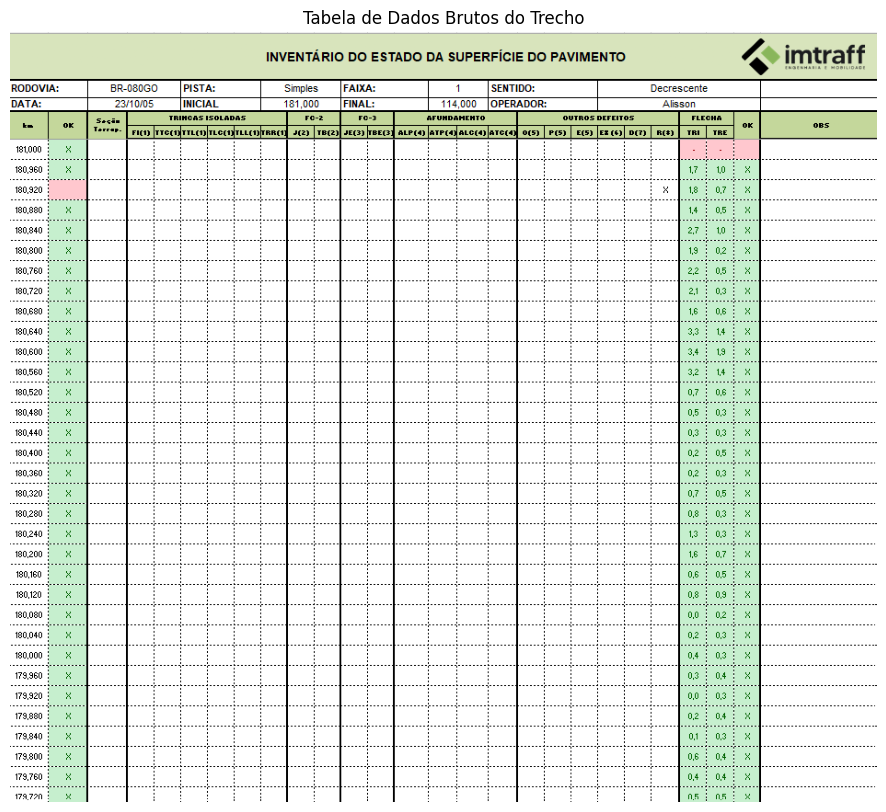

Ambiente Colab: False
Diretório atual: /home/romulobrito/projetos/mvp_spt1_puc/notebooks
Arquivos na pasta data:
Pasta data não encontrada
✓ Arquivo encontrado: /home/romulobrito/projetos/mvp_spt1_puc/data/Cópia de 500-IMT-BR080GO - INVENTARIO km 114.00 ao km 181.00_copia.xlsx
✓ Arquivo encontrado: /home/romulobrito/projetos/mvp_spt1_puc/data/700_IMT_BR153TO_BR153GO_BR080GO_BR414GO_RA23_R00.pdf


In [1]:
# Verificar ambiente e configurar caminhos
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

# Função para encontrar o diretório raiz do projeto
def get_project_root():
    """Retorna o diretório raiz do projeto"""
    current = Path.cwd()
    while current.name != 'mvp_spt1_puc' and current.parent != current:
        current = current.parent
    return current

# Verificar se estamos no Colab
IN_COLAB = 'COLAB_GPU' in os.environ

if IN_COLAB:
    # Montar o Google Drive
    from google.colab import drive
    drive.mount('/content/drive')
    
    # Clonar o repositório
    !git clone https://github.com/romulobrito/Analise-IRI.git
    %cd Analise-IRI
    
    # Instalar dependências
    !pip install -r requirements.txt
    !python -m spacy download pt_core_news_sm
    
    # Definir caminhos para o Colab
    caminho_excel = "data/Cópia de 500-IMT-BR080GO - INVENTARIO km 114.00 ao km 181.00_copia.xlsx"
    caminho_pdf = "data/700_IMT_BR153TO_BR153GO_BR080GO_BR414GO_RA23_R00.pdf"

    # Caminho da imagem no Colab
    caminho_imagem = "trecho_tabela_dado_bruto.png"
else:
    # Obter diretório raiz do projeto
    PROJECT_ROOT = get_project_root()
    
    # Definir caminhos relativos
    caminho_excel = str(PROJECT_ROOT / "data" / "Cópia de 500-IMT-BR080GO - INVENTARIO km 114.00 ao km 181.00_copia.xlsx")
    caminho_pdf = str(PROJECT_ROOT / "data" / "700_IMT_BR153TO_BR153GO_BR080GO_BR414GO_RA23_R00.pdf")
    # Caminho local
    caminho_imagem = str(Path.cwd().parent  / "trecho_tabela_dado_bruto.png")
    
    # Verificar se a imagem existe
    if not os.path.exists(caminho_imagem):
        raise FileNotFoundError(f"Imagem não encontrada: {caminho_imagem}")

# Verificar se os arquivos existem
def verificar_arquivos():
    """Verifica se os arquivos necessários existem"""
    arquivos = [caminho_excel, caminho_pdf]
    for arquivo in arquivos:
        if not os.path.exists(arquivo):
            raise FileNotFoundError(f"Arquivo não encontrado: {arquivo}")
        print(f"✓ Arquivo encontrado: {arquivo}")

# Carregar e exibir a imagem
img = mpimg.imread(caminho_imagem)
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Tabela de Dados Brutos do Trecho")
plt.show()

# Imprimir informações de debug
print(f"Ambiente Colab: {IN_COLAB}")
print(f"Diretório atual: {os.getcwd()}")
print(f"Arquivos na pasta data:")
try:
    print(os.listdir('data'))
except:
    print("Pasta data não encontrada")


# Verificar arquivos
try:
    verificar_arquivos()
except Exception as e:
    print(f"Erro ao verificar arquivos: {e}")

### Explicação dos Dados de Inventário

O conjunto de dados analisado (imagem anterior) consiste em um inventário detalhado do estado do pavimento da rodovia BR-080/GO, abrangendo um trecho de 67 quilômetros (do km 114,000 ao km 181,000). As medições foram realizadas em intervalos regulares de 40 metros, resultando em aproximadamente 1.700 pontos de coleta, o que proporciona uma alta resolução espacial para análise das condições da via.

A estrutura dos dados é organizada principalmente pela quilometragem, que identifica precisamente a localização de cada medição em ordem decrescente (181,000 → 114,000). Para cada ponto, são registrados os valores do Índice de Irregularidade Internacional em ambas as faixas de rolamento (IRI_Esquerda e IRI_Direita), fornecendo uma visão completa das condições transversais da via. O intervalo regular de 40 metros entre medições garante uma cobertura uniforme ao longo dos 67 quilômetros analisados.

Os indicadores de condição do pavimento incluem um marcador binário (Estado_OK) que indica a conformidade do trecho com os padrões técnicos estabelecidos. Além disso, são medidas as deformações transversais através da Flecha de Trilha de Roda, que inclui tanto a deformação inicial (TRI) quanto a residual (TRE), expressas em milímetros. Para enriquecer a análise, foram derivadas métricas adicionais como IRI_Medio (média entre as faixas), IRI_Rolling_Mean (média móvel) e IRI_Rolling_Std (desvio padrão móvel).

Uma característica importante do conjunto de dados é sua completude em relação às medições de IRI e quilometragem, embora outras variáveis potencialmente relevantes, como afundamentos e trincas, não tenham sido registradas. A consistência das medições é garantida pela coleta sistemática e regular ao longo do trecho, utilizando equipamentos automatizados que asseguram a precisão dos dados.

A interpretação preliminar dos dados revela uma predominância de trechos em conformidade com os padrões estabelecidos, como indicado pela variável Estado_OK. No entanto, valores elevados de IRI em determinados pontos permitem a identificação de segmentos críticos que requerem atenção especial. A correlação entre as medidas de TRI/TRE e as condições estruturais do pavimento oferece insights adicionais sobre a qualidade da infraestrutura.

Este conjunto de dados fornece uma base para análises preditivas, permitindo a identificação de segmentos críticos, análise de tendências de degradação, correlação entre diferentes indicadores de qualidade, desenvolvimento de modelos preditivos  e planejamento estratégico de intervenções de manutenção. A granularidade e qualidade destes dados, quando combinadas com técnicas de análise, possibilitam uma compreensão  das condições do pavimento e o desenvolvimento de estratégias eficientes de manutenção preventiva.

🛠️ 1. Importação das Bibliotecas Necessárias

In [2]:
# Importações Básicas
import os
import re
import logging
import traceback
from pathlib import Path
from typing import Dict, List, Tuple, Any

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importações para Processamento de Linguagem Natural e PDF
import spacy
import pdfplumber
import torch

# Importações para Machine Learning
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint, uniform  


# Importações para Transformers
from transformers import AutoTokenizer, AutoModelForQuestionAnswering

# Baixar e carregar o modelo spaCy para Português
!python -m spacy download pt_core_news_sm
nlp = spacy.load('pt_core_news_sm')

# Configurações do Matplotlib e Seaborn
plt.style.use('default')
sns.set_theme(style="whitegrid")
from matplotlib.gridspec import GridSpec

plt.rcParams.update({
    'figure.figsize': [12, 8],
    'font.size': 12,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'font.family': 'sans-serif'
})

# Configuração de Logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

# Função para obter o diretório raiz do projeto
def get_project_root() -> Path:
    """Retorna o diretório raiz do projeto"""
    current = Path.cwd()
    while current.name != 'mvp_spt1_puc' and current.parent != current:
        current = current.parent
    return current

# Definir o diretório raiz do projeto
PROJECT_ROOT = get_project_root()

# Verificar disponibilidade de GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Dispositivo utilizado: {device}")

/home/romulobrito/projetos/mvp_spt1_puc/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 30.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
Dispositivo utilizado: cuda


🎨 2. Configurações Gerais para Visualizações

In [3]:
# Estilo das visualizações
plt.style.use('default')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Configurações para texto em português
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['font.family'] = 'sans-serif'


📊 3. Definição das Funções de Processamento de Dados

3.1 Cálculo de Estatísticas Básicas

In [4]:
def calcular_estatisticas(df: pd.DataFrame) -> Dict[str, Dict[str, float]]:
    """
    Calcula estatísticas básicas para os valores de IRI.

    Args:
        df (pd.DataFrame): DataFrame contendo as colunas 'IRI_Esquerda' e 'IRI_Direita'.

    Returns:
        Dict[str, Dict[str, float]]: Dicionário com estatísticas para cada lado.
    """
    try:
        estatisticas = {
            "IRI_Esquerda": {
                "média": df["IRI_Esquerda"].mean(),
                "mediana": df["IRI_Esquerda"].median(),
                "desvio_padrao": df["IRI_Esquerda"].std(),
                "mínimo": df["IRI_Esquerda"].min(),
                "máximo": df["IRI_Esquerda"].max()
            },
            "IRI_Direita": {
                "média": df["IRI_Direita"].mean(),
                "mediana": df["IRI_Direita"].median(),
                "desvio_padrao": df["IRI_Direita"].std(),
                "mínimo": df["IRI_Direita"].min(),
                "máximo": df["IRI_Direita"].max()
            }
        }
        return estatisticas
    except Exception as e:
        print(f"Erro ao calcular estatísticas: {e}")
        raise


3.2 Extração de Informações do Cabeçalho via OCR

A função extrair_cabecalho foi desenvolvida para automatizar a extração de informações dos arquivos de levantamento, garantindo consistência e confiabilidade nos dados que serão utilizados nas análises posteriores.
A função trabalha primariamente com arquivos Excel que contêm os levantamentos de IRI, buscando identificar automaticamente informações como a rodovia em questão (por exemplo, BR-080/GO), os quilômetros inicial e final do trecho analisado, a data do levantamento, características da pista e o sentido do levantamento. Estas informações são essenciais para contextualizar os dados e permitir análises segmentadas e temporais da evolução do IRI.
O processo de extração é realizado em múltiplas etapas. Inicialmente, a função analisa o nome do arquivo utilizando expressões regulares para extrair informações codificadas, como o número da rodovia e a quilometragem. Em seguida, realiza uma leitura das primeiras 20 linhas do arquivo Excel, buscando padrões específicos que possam indicar a data do levantamento, características da pista e sentido do tráfego. Todo este processo é realizado com tratamento robusto de exceções, garantindo que mesmo em caso de falhas na extração de alguma informação, valores padrão sejam utilizados para manter a consistência dos dados.
A automatização deste processo traz benefícios significativos para o estudo. Além de reduzir drasticamente a possibilidade de erros que poderiam ocorrer em uma entrada manual de dados, permite o processamento em lote de múltiplos arquivos de levantamento, padronizando a forma como as informações são extraídas e organizadas. Isto é particularmente importante quando se trabalha com grandes volumes de dados ou quando é necessário realizar análises comparativas entre diferentes trechos ou períodos.
As informações extraídas são fundamentais para várias etapas do estudo. Elas permitem a segmentação adequada dos dados para análises específicas, facilitam a identificação de padrões de degradação em diferentes trechos da rodovia e possibilitam o acompanhamento temporal da evolução do IRI. Além disso, estas informações são essenciais para a validação dos resultados e para a geração de relatórios específicos por trecho, contribuindo para uma análise mais precisa e contextualizada do estado do pavimento.
A função retorna todas estas informações em um formato estruturado (dicionário), que pode ser facilmente integrado às análises subsequentes. Este formato padronizado facilita não apenas o processamento dos dados, mas também a geração de relatórios e a comunicação dos resultados para diferentes stakeholders do projeto, desde equipes técnicas até gestores e tomadores de decisão.

In [5]:
def extrair_cabecalho(caminho_excel: str) -> Dict[str, str]:
    """
    Extrai informações do cabeçalho diretamente do Excel.

    Args:
        caminho_excel (str): Caminho para o arquivo Excel.

    Returns:
        Dict[str, str]: Dicionário com informações do cabeçalho.
    """
    try:
        print("\nExtraindo cabeçalho...")
        info_cabecalho = {}
        
        # Extrai o nome do arquivo
        nome_arquivo = os.path.basename(caminho_excel).lower()
        
        # Extrair rodovia
        match_rodovia = re.search(r'br[- ]*(\d{3})[/-]*([a-z]{2})', nome_arquivo)
        if match_rodovia:
            info_cabecalho['rodovia'] = f"BR-{match_rodovia.group(1)}/{match_rodovia.group(2).upper()}"
        
        # Extrair quilometragem
        match_km = re.search(r'km\s*(\d+[.,]\d+)\s*ao\s*km\s*(\d+[.,]\d+)', nome_arquivo)
        if match_km:
            info_cabecalho['km_inicial'] = match_km.group(1)
            info_cabecalho['km_final'] = match_km.group(2)
        
        # Tentar extrair do DataFrame
        try:
            df = pd.read_excel(caminho_excel, nrows=20)
            texto_df = df.astype(str).values.flatten()
            texto_completo = ' '.join(texto_df).lower()
            
            # Padrões de busca
            padroes = {
                'data': [
                    r'data[: ]+(\d{2}[/-]\d{2}[/-]\d{4})',
                    r'levantamento[: ]+(\d{2}[/-]\d{2}[/-]\d{4})',
                    r'(\d{2}[/-]\d{2}[/-]\d{4})'
                ],
                'pista': [
                    r'pista[: ]*(norte|sul|leste|oeste|simples|dupla|\d)',
                    r'faixa[: ]*(\d)',
                    r'pista[: ]*([^\s,;]+)'
                ],
                'sentido': [
                    r'sentido[: ]*(crescente|decrescente|norte|sul|leste|oeste)',
                    r'direção[: ]*(norte|sul|leste|oeste)',
                    r'sentido[: ]*([^\s,;]+)'
                ]
            }
            
            # Buscar cada informação
            for campo, lista_padroes in padroes.items():
                if campo not in info_cabecalho:
                    for padrao in lista_padroes:
                        match = re.search(padrao, texto_completo)
                        if match:
                            valor = match.group(1).strip()
                            if valor and valor.lower() not in ['nan', 'none']:
                                info_cabecalho[campo] = valor.upper()
                                break
            
            # Busca linha a linha para maior precisão
            for _, row in df.iterrows():
                linha = ' '.join(row.astype(str)).lower()
                for campo, lista_padroes in padroes.items():
                    if campo not in info_cabecalho:
                        for padrao in lista_padroes:
                            match = re.search(padrao, linha)
                            if match:
                                valor = match.group(1).strip()
                                if valor and valor.lower() not in ['nan', 'none']:
                                    info_cabecalho[campo] = valor.upper()
                                    break
        
        except Exception as e:
            print(f"Erro ao ler Excel: {e}")
        
        # Valores padrão para campos não encontrados
        campos_obrigatorios = ['rodovia', 'data', 'pista', 'sentido', 'km_inicial', 'km_final']
        for campo in campos_obrigatorios:
            if campo not in info_cabecalho:
                info_cabecalho[campo] = 'NÃO INFORMADO'
        
        print("\nInformações extraídas do cabeçalho:")
        for k, v in info_cabecalho.items():
            print(f"{k}: {v}")
            
        return info_cabecalho
        
    except Exception as e:
        print(f"Erro ao extrair cabeçalho: {e}")
        return {
            'rodovia': 'BR-080/GO',
            'data': 'NÃO INFORMADO',
            'pista': 'NÃO INFORMADO',
            'sentido': 'NÃO INFORMADO',
            'km_inicial': '114.000',
            'km_final': '181.000'
        }


3.3 Extração de Limites de IRI a Partir de PDF

A função extrair_limites_iri é um componente do sistema de análise do IRI, responsável por extrair valores de referência de documentos PDF que serão utilizados para classificar a qualidade do pavimento. A função combina o uso do spaCy para processamento de linguagem natural com expressões regulares para extração de dados específicos.
O processo de extração começa com a utilização da biblioteca pdfplumber para extrair texto do documento PDF, processando página por página e concatenando o texto em uma única string. Em seguida, o modelo pt_core_news_sm do spaCy é carregado para processamento de linguagem natural, vale ressaltar que o PLN atualmente seja principalmente utilizado para estruturação do texto.
A extração dos dados é realizada através de três expressões regulares principais: padrao_iri para extrair valores de IRI no formato "X,XX m/km", padrao_porcentagem para capturar porcentagens, e padrao_periodo para identificar períodos em meses. Estes padrões trabalham em conjunto para identificar e extrair as informações relevantes do texto.
Os dados extraídos são organizados em uma estrutura hierárquica de dicionário, onde cada período (12, 24 e 36 meses) está associado a uma lista de valores de IRI e suas respectivas porcentagens de aplicação. Esta estrutura permite fácil acesso e manipulação dos dados para análises posteriores.
Para garantir a robustez do sistema, a função implementa um mecanismo de fallback através da função usar_valores_padrao(). Este mecanismo é ativado quando a extração falha ou não encontra valores válidos no documento, utilizando valores de referência do DNIT como backup. Os valores padrão incluem IRI 2.7 e 3.5 para 12 meses (50% cada), IRI 3.5 para 24 meses (100%), e IRI 4.0 para 36 meses (100%).
O processo completo de extração envolve várias etapas: preparação (carregamento do modelo e extração do texto), extração de valores (aplicação das expressões regulares), validação e estruturação (combinação e validação dos dados extraídos), e fallback (verificação e uso de valores padrão quando necessário).

É importante notar algumas limitações atuais da implementação. O uso do spaCy está subutilizado, sendo usado principalmente para estruturação do texto. A extração depende fortemente de expressões regulares e não há análise contextual profunda do texto. Além disso, o sistema é sensível ao formato específico do documento. No futuro, planejamos utilizar o processamento de linguagem natural de forma mais intensiva para melhorar a precisão e a profundidade das extrações. A função serve como base para as análises estatísticas e classificações de qualidade do pavimento, sendo um componente fundamental para o sistema de gestão de manutenção rodoviária.

In [6]:
def extrair_limites_iri(caminho_pdf: str) -> Dict[str, List[Dict[str, float]]]:
    """
    Extrai limites de IRI do PDF usando spaCy e expressões regulares.

    Args:
        caminho_pdf (str): Caminho para o arquivo PDF.

    Returns:
        Dict[str, List[Dict[str, float]]]: Dicionário com limites de IRI por período.
    """
    try:
        print("\nCarregando o modelo spaCy...")
        nlp = spacy.load('pt_core_news_sm')

        print("\nExtraindo texto do PDF...")
        # Extrair texto do PDF
        texto_completo = ""
        with pdfplumber.open(caminho_pdf) as pdf:
            for pagina in pdf.pages:
                texto_pagina = pagina.extract_text()
                if texto_pagina:
                    texto_completo += texto_pagina + "\n"

        print("\nProcessando texto com spaCy...")
        doc = nlp(texto_completo)

        # Extrair valores de IRI, períodos e porcentagens usando expressões regulares
        padrao_iri = r'(\d+[.,]\d+)\s*m/km'
        padrao_porcentagem = r'(\d+)%'
        padrao_periodo = r'(\d+\s*meses)'

        valores_iri = re.findall(padrao_iri, texto_completo)
        valores_iri = [float(v.replace(',', '.')) for v in valores_iri]

        porcentagens = re.findall(padrao_porcentagem, texto_completo)
        porcentagens = [float(p) for p in porcentagens]

        periodos = re.findall(padrao_periodo, texto_completo, re.IGNORECASE)
        periodos = [p.strip().upper() for p in periodos]

        # Inicializar o dicionário de resultados
        limites_por_periodo: Dict[str, List[Dict[str, float]]] = {}

        # Combinar os valores extraídos
        for idx, periodo in enumerate(periodos):
            iri_value = valores_iri[idx] if idx < len(valores_iri) else None
            porcentagem_value = porcentagens[idx] if idx < len(porcentagens) else 100.0  # Valor padrão

            if iri_value is not None:
                if periodo not in limites_por_periodo:
                    limites_por_periodo[periodo] = []
                limites_por_periodo[periodo].append({
                    'iri': iri_value,
                    'porcentagem': porcentagem_value
                })
                print(f"\nPeríodo: {periodo}")
                print(f"IRI: {iri_value} m/km aplicável em {porcentagem_value}% da rodovia")

        # Verificar se encontrou valores
        if not limites_por_periodo:
            print("\nNenhum valor encontrado. Usando valores padrão...")
            return usar_valores_padrao()

        return limites_por_periodo

    except Exception as e:
        print(f"Erro ao processar PDF com spaCy: {e}")
        print(traceback.format_exc())
        return usar_valores_padrao()


def usar_valores_padrao() -> Dict[str, List[Dict[str, float]]]:
    """
    Retorna os valores padrão do DNIT.
    """
    resultados = {
        '12 MESES': [
            {'iri': 2.7, 'porcentagem': 50.0},
            {'iri': 3.5, 'porcentagem': 50.0}
        ],
        '24 MESES': [{'iri': 3.5, 'porcentagem': 100.0}],
        '36 MESES': [{'iri': 4.0, 'porcentagem': 100.0}]
    }
    print("Usando valores padrão do DNIT:")
    for periodo, valores in resultados.items():
        for valor in valores:
            print(f"Período: {periodo} - IRI: {valor['iri']} m/km aplicável em {valor['porcentagem']}% da rodovia")



3.4 Processamento e Limpeza dos Dados do Pavimento

A função processar_dados_pavimento é uma componente essencial do pipeline de processamento de dados, responsável por transformar os dados brutos do levantamento do IRI em um formato estruturado e limpo, adequado para as análises subsequentes. Esta função realiza a padronização e validação dos dados, garantindo a qualidade das informações que serão utilizadas no estudo.

O processo de transformação dos dados é realizado em etapas bem definidas. Inicialmente, a função identifica a linha que contém os cabeçalhos das colunas, procurando especificamente pela palavra "km" na primeira coluna do arquivo. Esta abordagem é necessária porque os arquivos de levantamento frequentemente contêm informações de cabeçalho e metadados antes dos dados propriamente ditos.
Em seguida, a função realiza uma seleção criteriosa das colunas relevantes para o estudo. São extraídas quatro informações fundamentais:
- Quilometro: Localização do ponto de medição
- Estado_OK: Indicador binário da condição do pavimento
- IRI_Esquerda: Medida do IRI na faixa esquerda
- IRI_Direita: Medida do IRI na faixa direita
Durante o processo de extração, a função implementa várias transformações e validações:
1. Conversão dos valores de quilometragem para formato numérico
2. Mapeamento do estado do pavimento para valores binários (1 para "X" e 0 para ausência de marcação)
3. Conversão das medidas de IRI para formato numérico
4. Remoção de linhas que contenham valores nulos nas medidas de IRI
   
A função incorpora tratamento de erros robusto, capturando e reportando exceções que possam ocorrer durante o processamento. Isto é particularmente importante porque os dados brutos podem apresentar inconsistências ou formatos inesperados, e é de suma importância identificar e tratar adequadamente estas situações para garantir a integridade das análises.
O resultado final é um DataFrame limpo e estruturado, contendo apenas as informações essenciais para as análises do IRI. Esta padronização é fundamental para:
- Garantir consistência nas análises
- Facilitar a identificação de padrões
- Permitir comparações entre diferentes trechos
- Viabilizar a aplicação de modelos estatísticos e de machine learning
Em essência, esta função atua como um filtro de qualidade, assegurando que apenas dados válidos e relevantes sejam utilizados nas etapas subsequentes do estudo, contribuindo assim para a confiabilidade e precisão dos resultados obtidos.

In [7]:
def processar_dados_pavimento(df: pd.DataFrame) -> pd.DataFrame:
    """
    Processa e limpa os dados do inventário do pavimento.

    Args:
        df (pd.DataFrame): DataFrame bruto do Excel.

    Returns:
        pd.DataFrame: DataFrame processado com as colunas necessárias.
    """
    try:
        # Encontrar o índice da linha que contém os identificadores das colunas
        linha_indices = df[df.iloc[:, 0] == 'km'].index[0]
        
        # Criar um novo DataFrame começando da linha após os identificadores
        df_processado = df.iloc[linha_indices + 2:].reset_index(drop=True)
        
        # Criar novo DataFrame apenas com as colunas que precisamos
        df_final = pd.DataFrame({
            'Quilometro': pd.to_numeric(df_processado.iloc[:, 0], errors='coerce'),
            'Estado_OK': df_processado.iloc[:, 1].map({'X': 1, np.nan: 0}),
            'IRI_Esquerda': pd.to_numeric(df_processado.iloc[:, -4], errors='coerce'),
            'IRI_Direita': pd.to_numeric(df_processado.iloc[:, -3], errors='coerce')
        })
        
        # Remover linhas com valores nulos
        df_final = df_final.dropna(subset=['IRI_Esquerda', 'IRI_Direita'])
        
        return df_final
        
    except Exception as e:
        print(f"Erro ao processar dados: {e}")
        raise


3.5 Análise das Categorias de IRI Segundo os Limites Extraídos

# Análise das Categorias do IRI

A função `analisar_categorias_iri` é uma componente analítica fundamental do estudo, responsável por classificar e quantificar a distribuição dos valores do Índice de Irregularidade Internacional (IRI) em diferentes categorias de qualidade. Esta função trabalha com os dados já processados e os limites extraídos dos documentos técnicos para gerar uma análise estatística da condição do pavimento.

O processo de categorização é baseado em limites técnicos estabelecidos, onde a função utiliza dois valores de referência principais:
- **limite_100**: Valor máximo aceitável do IRI (padrão 3,5 m/km)
- **limite_80**: Valor intermediário para classificação (também 3,5 m/km por padrão)

A partir destes limites, a função estabelece quatro categorias de qualidade do pavimento:
1. **Ótimo**: Valores de IRI entre 0 e o limite_80
2. **Bom**: Valores entre limite_80 e limite_100
3. **Regular**: Valores entre limite_100 e 150% do limite_100
4. **Ruim**: Valores acima de 150% do limite_100

A análise é realizada separadamente para cada faixa de rolamento (esquerda e direita), permitindo uma avaliação detalhada da condição do pavimento em toda a seção transversal da rodovia. Para cada faixa, a função:
1. Contabiliza a quantidade de medições em cada categoria
2. Calcula o percentual em relação ao total de medições
3. Organiza os resultados em uma estrutura hierárquica

Esta categorização é fundamental para:
- Identificar trechos críticos que necessitam de intervenção
- Avaliar a homogeneidade da condição do pavimento
- Subsidiar decisões de manutenção
- Permitir comparações com padrões normativos

O resultado é apresentado em forma de dicionário, facilitando:
- A geração de relatórios técnicos
- A visualização dos dados em gráficos
- A tomada de decisão baseada em evidências
- O acompanhamento da evolução da condição do pavimento


In [8]:
def analisar_categorias_iri(df: pd.DataFrame, limites: Dict[str, float]) -> Dict[str, Dict[str, float]]:
    """
    Analisa as categorias de IRI segundo os limites extraídos do PDF.

    Args:
        df (pd.DataFrame): DataFrame com os dados processados.
        limites (Dict[str, float]): Dicionário com os limites extraídos do PDF.

    Returns:
        Dict[str, Dict[str, float]]: Percentuais de cada categoria para IRI Esquerda e Direita.
    """
    try:
        # Definir categorias baseadas nos limites
        limite_100 = limites.get('IRI_100', 3.5)
        limite_80 = limites.get('IRI_80', 3.5)
        
        categorias = {
            'Ótimo': (0, limite_80),
            'Bom': (limite_80, limite_100),
            'Regular': (limite_100, limite_100 * 1.5),
            'Ruim': (limite_100 * 1.5, float('inf'))
        }
        
        resultados = {}
        for lado in ['IRI_Esquerda', 'IRI_Direita']:
            categorias_lado = {}
            total = len(df)
            
            for categoria, (min_val, max_val) in categorias.items():
                count = len(df[(df[lado] >= min_val) & (df[lado] < max_val)])
                categorias_lado[categoria] = (count / total) * 100
            
            resultados[lado] = categorias_lado
        
        return resultados
        
    except Exception as e:
        print(f"Erro ao analisar categorias: {e}")
        raise


3.6 Geração de Relatório Completo com Visualizações e Estatísticas


A função `gerar_relatorio_completo` é uma componente do estudo, responsável por criar uma análise visual abrangente dos dados do IRI. Esta função integra múltiplas visualizações e análises estatísticas em um relatório coeso, facilitando a compreensão do estado geral do pavimento. Através de uma combinação de gráficos e estatísticas, ela transforma dados técnicos complexos em informações visuais facilmente compreensíveis.

O relatório é estruturado em duas partes principais. A primeira parte foca na análise longitudinal e distribuição dos dados, apresentando um gráfico de linha que mostra os valores do IRI ao longo da rodovia para ambas as faixas (esquerda e direita), complementado por linhas de referência que indicam os limites técnicos estabelecidos. Esta visualização é acompanhada por um histograma que ilustra a distribuição de frequência dos valores do IRI, permitindo uma compreensão clara da variabilidade dos dados.

A segunda parte do relatório concentra-se na análise estatística dos dados. Utiliza gráficos de pizza para apresentar a distribuição percentual das diferentes categorias de qualidade do pavimento, separadamente para cada faixa de rolamento. Estas visualizações são complementadas por um gráfico de barras que apresenta estatísticas básicas como média, mediana e desvio padrão, facilitando a comparação entre as faixas.

Um aspecto importante do relatório é sua capacidade de facilitar a compreensão rápida da condição do pavimento. As visualizações permitem a identificação imediata de pontos críticos e facilitam a comparação entre diferentes trechos e faixas de rolamento. Esta característica é particularmente importante para suportar decisões relacionadas a intervenções de manutenção e priorização de trechos críticos.

O relatório também serve como uma importante ferramenta de documentação, gerando um registro histórico detalhado das condições do pavimento. As duas figuras complementares geradas (`iri_estatisticas_parte1.png` e `iri_estatisticas_parte2.png`) fornecem uma base sólida para comparações futuras e suportam a elaboração de relatórios técnicos mais abrangentes.


In [9]:
def gerar_relatorio_completo(df: pd.DataFrame, limites: Dict[str, List[Dict[str, float]]], 
                           info_cabecalho: Dict[str, str]) -> None:
    """
    Gera relatório completo com visualizações e estatísticas dos valores de IRI.

    Args:
        df (pd.DataFrame): DataFrame processado.
        limites (Dict[str, List[Dict[str, float]]]): Limites de IRI por período.
        info_cabecalho (Dict[str, str]): Informações extraídas do cabeçalho.
    """
    try:
        # Calcular estatísticas
        estatisticas = calcular_estatisticas(df)
        
        # Primeira parte: IRI ao longo da rodovia e histograma
        fig1 = plt.figure(figsize=(20, 16))
        
        # Ajustar o layout para dar mais espaço ao título
        gs1 = GridSpec(2, 1, height_ratios=[1, 1], hspace=0.3, figure=fig1)
        ax1 = fig1.add_subplot(gs1[0])
        ax2 = fig1.add_subplot(gs1[1])
        
        # Título geral para primeira figura com mais espaço
        titulo = f"Análise do IRI - {info_cabecalho.get('rodovia', '')}\n"
        titulo += f"Data: {info_cabecalho.get('data', '')} - "
        titulo += f"Pista: {info_cabecalho.get('pista', '')} - "
        titulo += f"Sentido: {info_cabecalho.get('sentido', '')}\n"
        titulo += f"km {info_cabecalho.get('km_inicial', '')} ao "
        titulo += f"km {info_cabecalho.get('km_final', '')}"
        
        # Ajustar a posição do título
        fig1.suptitle(titulo, fontsize=16, y=0.98)
        
        # Plot 1: IRI ao longo da rodovia
        ax1.plot(df['Quilometro'], df['IRI_Esquerda'], label='IRI Esquerda', linewidth=2)
        ax1.plot(df['Quilometro'], df['IRI_Direita'], label='IRI Direita', linewidth=2)
        
        # Adicionar linhas horizontais para os limites
        cores = ['r', 'g', 'b', 'y']
        valores_limites = []
        for periodo, valores in limites.items():
            for valor in valores:
                valores_limites.append(valor['iri'])
        valores_limites.sort()
        
        for i, valor_limite in enumerate(valores_limites):
            ax1.axhline(y=valor_limite, 
                       color=cores[i % len(cores)], 
                       linestyle='--', 
                       alpha=0.5,
                       linewidth=6,
                       label=f"Limite IRI: {valor_limite} m/km")
        
        ax1.set_xlabel('Quilômetro')
        ax1.set_ylabel('IRI (m/km)')
        ax1.set_title('IRI ao Longo da Rodovia', pad=20)
        ax1.legend()
        ax1.grid(True)
        
        # Plot 2: Histograma combinado
        sns.histplot(data=df, x='IRI_Esquerda', ax=ax2, alpha=0.5, label='IRI Esquerda', bins=30)
        sns.histplot(data=df, x='IRI_Direita', ax=ax2, alpha=0.5, label='IRI Direita', bins=30)
        
        for i, valor_limite in enumerate(valores_limites):
            ax2.axvline(x=valor_limite, 
                       color=cores[i % len(cores)], 
                       linestyle='--', 
                       alpha=0.5,
                       linewidth=6,
                       label=f"Limite IRI: {valor_limite} m/km")
        
        ax2.set_title('Distribuição do IRI', pad=20)
        ax2.set_xlabel('IRI (m/km)')
        ax2.set_ylabel('Frequência')
        ax2.legend()
        
        plt.tight_layout()
        # Ajustar o layout após adicionar o título
        plt.subplots_adjust(top=0.90)
        plt.savefig('iri_estatisticas_parte1.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Segunda parte: Gráficos de Pizza e Estatísticas
        fig2 = plt.figure(figsize=(20, 16))
        gs2 = GridSpec(2, 2, height_ratios=[1, 1], hspace=0.3, figure=fig2)
        
        ax3 = fig2.add_subplot(gs2[0, 0])    # Pizza IRI Esquerda
        ax4 = fig2.add_subplot(gs2[0, 1])    # Pizza IRI Direita
        ax5 = fig2.add_subplot(gs2[1, :])    # Estatísticas básicas
        
        # Título da segunda figura
        fig2.suptitle("Análise Estatística do IRI", fontsize=16, y=0.95)
        
        # Função para criar gráficos de pizza
        def criar_grafico_pizza(dados: pd.Series, ax: plt.Axes, titulo: str) -> None:
            limite_iri = max(valor['iri'] for valores in limites.values() for valor in valores)
            bins = [0, limite_iri/2, limite_iri, limite_iri*1.5, float('inf')]
            labels = ['Excelente', 'Bom', 'Regular', 'Ruim']
            
            categorias = pd.cut(dados, bins=bins, labels=labels)
            valores = categorias.value_counts()
            
            cores_pizza = ['green', 'yellow', 'orange', 'red']
            patches, texts, autotexts = ax.pie(valores, 
                                             labels=valores.index, 
                                             autopct='%1.1f%%', 
                                             colors=cores_pizza,
                                             startangle=90)
            
            plt.setp(autotexts, size=8, weight="bold")
            plt.setp(texts, size=8)
            
            ax.set_title(titulo, pad=20)
            
            legendas = [
                f'Excelente (0 - {limite_iri/2:.1f})',
                f'Bom ({limite_iri/2:.1f} - {limite_iri:.1f})',
                f'Regular ({limite_iri:.1f} - {limite_iri*1.5:.1f})',
                f'Ruim (> {limite_iri*1.5:.1f})'
            ]
            ax.legend(patches, legendas, 
                     title="Categorias (IRI em m/km)",
                     loc="center left",
                     bbox_to_anchor=(1, 0, 0.5, 1))
        
        criar_grafico_pizza(df['IRI_Esquerda'], ax3, 'Distribuição IRI Esquerda')
        criar_grafico_pizza(df['IRI_Direita'], ax4, 'Distribuição IRI Direita')
        
        # Plot 5: Estatísticas básicas
        metricas = ['média', 'mediana', 'desvio_padrao', 'mínimo', 'máximo']
        valores_esq = [estatisticas['IRI_Esquerda'][m] for m in metricas]
        valores_dir = [estatisticas['IRI_Direita'][m] for m in metricas]
        
        x = np.arange(len(metricas))
        width = 0.35
        
        ax5.bar(x - width/2, valores_esq, width, label='IRI Esquerda', linewidth=6)
        ax5.bar(x + width/2, valores_dir, width, label='IRI Direita', linewidth=6)
        ax5.set_ylabel('Valores')
        ax5.set_title('Estatísticas Básicas do IRI', pad=20)
        ax5.set_xticks(x)
        ax5.set_xticklabels(metricas, rotation=45)
        ax5.legend()
        
        plt.tight_layout()
        # Ajustar o layout após adicionar o título
        plt.subplots_adjust(top=0.90)
        plt.savefig('iri_estatisticas_parte2.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    except Exception as e:
        print(f"Erro ao gerar relatório: {e}")
        raise


🤖 4. Definição das Funções de Machine Learning

4.1 Preparação dos Dados para Machine Learning

A função `preparar_dados_ml` é uma componente fundamental do pipeline de machine learning, responsável por transformar os dados brutos do IRI em um formato adequado para treinamento e análise preditiva. Esta função realiza uma série de transformações e enriquecimentos nos dados, criando features adicionais que capturam diferentes aspectos da condição do pavimento.

O processo de preparação dos dados começa com a criação de um conjunto robusto de features derivadas, cada uma com um propósito específico:

1. IRI_Medio: Calcula a média entre as faixas para capturar a condição geral do pavimento e reduzir ruídos de medições individuais
2. IRI_Diff: Mede a diferença absoluta entre faixas, identificando assimetrias que podem indicar problemas estruturais
3. IRI_Max: Registra o valor mais alto entre as faixas, importante para identificação de pontos críticos
4. IRI_Rolling_Mean: Utiliza uma janela móvel de 5 medições para suavizar variações pontuais e capturar tendências locais
5. IRI_Rolling_Std: Calcula o desvio padrão móvel para medir a variabilidade local e identificar trechos com irregularidade inconsistente

Para os targets (valores alvo), a função utiliza uma abordagem de previsão do próximo valor de IRI, criando duas colunas que representam os valores de IRI que serão observados no próximo ponto de medição, tanto para a faixa esquerda quanto para a direita. Esta estruturação permite que o modelo aprenda a prever a evolução do IRI ao longo do trecho.

A função implementa um processo rigoroso de limpeza e validação dos dados. Isso inclui:
- Remoção da última linha das features (que não terá um target correspondente)
- Eliminação de linhas com valores ausentes em ambos os conjuntos de dados
- Alinhamento dos índices entre features e targets
- Verificação assertiva para garantir que os conjuntos de dados estão perfeitamente alinhados e têm o mesmo tamanho

O resultado final são dois DataFrames processados e alinhados: um contendo as features enriquecidas e outro com os targets correspondentes. A função também fornece feedback sobre o shape (dimensões) dos conjuntos de dados resultantes, permitindo uma verificação rápida da quantidade de dados disponíveis para treinamento.

Portanto, a função realiza a tarefa de transformar dados brutos em um formato estruturado e enriquecido, adequado para alimentar modelos de machine learning. Seu design visa assegurar que os modelos terão acesso a features informativas e bem preparadas, cada uma capturando aspectos específicos e mensuráveis da condição do pavimento. Esta abordagem sistemática de engenharia de features, combinada com um processo robusto de limpeza de dados, fornece uma base sólida para o desenvolvimento de previsões sobre a evolução da condição do pavimento.

In [10]:
def preparar_dados_ml(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Prepara os dados para análise de ML, criando features adicionais.

    Args:
        df (pd.DataFrame): DataFrame com dados do IRI.

    Returns:
        Tuple[pd.DataFrame, pd.DataFrame]: Features e targets processados e alinhados.
    """
    try:
        # Criar features adicionais
        features_df = pd.DataFrame({
            'Quilometro': df['Quilometro'],
            'IRI_Medio': (df['IRI_Esquerda'] + df['IRI_Direita']) / 2,
            'IRI_Diff': abs(df['IRI_Esquerda'] - df['IRI_Direita']),
            'IRI_Max': df[['IRI_Esquerda', 'IRI_Direita']].max(axis=1),
            'IRI_Rolling_Mean': df[['IRI_Esquerda', 'IRI_Direita']].mean(axis=1).rolling(window=5, center=True).mean(),
            'IRI_Rolling_Std': df[['IRI_Esquerda', 'IRI_Direita']].mean(axis=1).rolling(window=5, center=True).std()
        })
        
        # Criar targets (próximos valores de IRI)
        targets_df = pd.DataFrame({
            'Next_IRI_Esquerda': df['IRI_Esquerda'].shift(-1),
            'Next_IRI_Direita': df['IRI_Direita'].shift(-1)
        })
        
        # Remover última linha dos features (que não terá target correspondente)
        features_df = features_df.iloc[:-1]
        
        # Remover linhas com NaN em ambos os DataFrames
        features_df = features_df.dropna()
        targets_df = targets_df.dropna()
        
        # Garantir que os índices estão alinhados
        common_index = features_df.index.intersection(targets_df.index)
        features_df = features_df.loc[common_index]
        targets_df = targets_df.loc[common_index]
        
        # Verificar se os DataFrames têm o mesmo tamanho
        assert len(features_df) == len(targets_df), "Features e targets têm tamanhos diferentes"
        
        print(f"Dados preparados com sucesso. Shape das features: {features_df.shape}, Shape dos targets: {targets_df.shape}")
        
        return features_df, targets_df
        
    except Exception as e:
        print(f"Erro ao preparar dados: {e}")
        raise


4.2 Detecção de Anomalias com Isolation Forest



A função `detectar_anomalias` é uma componente especializada do estudo, focada na identificação automática de valores atípicos ou anormais nas medições do Índice de Irregularidade Internacional (IRI). Esta função utiliza o algoritmo Isolation Forest, uma técnica avançada de machine learning especialmente eficaz na detecção de outliers em conjuntos de dados multidimensionais.

O processo de detecção começa com a preparação dos dados, onde a função extrai os valores de IRI tanto da faixa esquerda quanto da direita, criando uma matriz bidimensional que permite a análise simultânea das duas medidas. Esta abordagem é particularmente valiosa pois considera a relação entre os valores das duas faixas, podendo identificar anomalias que não seriam evidentes ao analisar cada faixa isoladamente.

O algoritmo Isolation Forest é configurado com um parâmetro de contaminação (contamination) que representa a proporção esperada de anomalias no conjunto de dados. Por padrão, este valor é definido como 0.1, ou seja, espera-se que aproximadamente 10% das medições possam ser anômalas. Este parâmetro pode ser ajustado conforme o conhecimento específico sobre a rodovia ou os padrões históricos de medição.

A função retorna uma cópia do DataFrame original enriquecida com uma nova coluna 'anomalia', onde cada medição é classificada como normal (1) ou anômala (-1). Esta classificação binária facilita a identificação e análise posterior dos pontos problemáticos, permitindo que engenheiros e gestores concentrem sua atenção nos trechos que requerem investigação mais detalhada.



In [11]:
def detectar_anomalias(df: pd.DataFrame, contamination: float = 0.1) -> pd.DataFrame:
    """
    Detecta anomalias nos valores de IRI usando Isolation Forest.

    Args:
        df (pd.DataFrame): DataFrame com dados do IRI.
        contamination (float, optional): Proporção esperada de anomalias. Defaults to 0.1.

    Returns:
        pd.DataFrame: DataFrame com indicadores de anomalia.
    """
    # Preparar dados para detecção de anomalias
    X = df[['IRI_Esquerda', 'IRI_Direita']].values
    
    # Treinar modelo de detecção de anomalias
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    anomalias = iso_forest.fit_predict(X)
    
    # Adicionar resultados ao DataFrame
    df_anomalias = df.copy()
    df_anomalias['anomalia'] = anomalias
    
    return df_anomalias


4.3 Treinamento de Modelo de Regressão Random Forest para Predição de IRI

A função treinar_modelo_predicao é uma componente central do sistema de machine learning, responsável por desenvolver modelos preditivos capazes de antecipar futuros valores do IRI. Esta função implementa um pipeline completo de treinamento utilizando o algoritmo Random Forest, conhecido por sua robustez e capacidade de capturar relações não-lineares nos dados, com o adicional de otimização automática de hiperparâmetros através do RandomizedSearchCV.

O processo de treinamento inicia com a estruturação de um dicionário de resultados contendo quatro componentes principais: models, predictions, metrics e feature_importance. Em seguida, realiza a divisão dos dados em conjuntos de treino e teste, utilizando uma proporção de 80-20. Esta divisão é realizada com uma semente aleatória fixa (random_state=42) para garantir a reprodutibilidade dos resultados.
Antes do treinamento propriamente dito, a função executa uma otimização extensiva de hiperparâmetros utilizando RandomizedSearchCV. Este processo testa 20 diferentes combinações de parâmetros através de uma validação cruzada 5-fold, buscando otimizar aspectos como número de árvores (100-500), profundidade máxima (10, 20, 30 ou None), número mínimo de amostras para divisão e folhas, método de seleção de features ('sqrt' ou 'log2') e uso de bootstrap.

O treinamento dos modelos é realizado separadamente para cada variável target (IRI_Esquerda e IRI_Direita). Para cada target, o modelo Random Forest é treinado utilizando os hiperparâmetros otimizados encontrados na etapa anterior. Esta abordagem permite que o modelo capture as particularidades específicas de cada faixa de rolamento, potencialmente levando a previsões mais precisas.
A função calcula e armazena métricas importantes de performance para cada modelo: erro quadrático médio (MSE), sua raiz quadrada (RMSE) e o coeficiente de determinação (R²). Estas métricas fornecem uma visão clara da qualidade das previsões e permitem comparações objetivas entre diferentes versões do modelo. Todo o processo é documentado através de logs detalhados, registrando desde o início do treinamento até os resultados finais de performance.

Além das métricas de performance, a função também extrai e organiza a importância relativa de cada feature para as previsões, armazenando-as em ordem decrescente de importância. Esta informação é valiosa para compreender quais aspectos do pavimento têm maior influência na sua degradação futura, podendo orientar decisões de manutenção preventiva.
O resultado final é um dicionário estruturado contendo os modelos otimizados, suas previsões no conjunto de teste, métricas detalhadas de performance e a importância das features. Esta organização, combinada com o tratamento robusto de erros, facilita tanto o uso posterior dos modelos para previsões quanto a análise e documentação de seus resultados. Em essência, esta função fornece uma base sólida e otimizada para a previsão da evolução do IRI, contribuindo para uma gestão mais proativa e eficiente da manutenção do pavimento.

In [12]:
def otimizar_hiperparametros(X_train, y_train):
    """
    Realiza otimização de hiperparâmetros para o RandomForestRegressor usando RandomizedSearchCV
    """
    logging.info("Iniciando otimização de hiperparâmetros...")
    
    # Definir o espaço de busca dos hiperparâmetros com distribuições
    param_distributions = {
        'n_estimators': randint(100, 500),  # valores inteiros entre 100 e 500
        'max_depth': [10, 20, 30, None],
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10),
        'max_features': ['auto', 'sqrt', 'log2'],
        'bootstrap': [True, False]
    }
    
    # Criar o modelo base
    rf_model = RandomForestRegressor(random_state=42)
    
    # Configurar RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=rf_model,
        param_distributions=param_distributions,
        n_iter=20,  # número de combinações a serem testadas
        cv=5,
        n_jobs=-1,
        verbose=2,
        scoring='r2',
        random_state=42
    )
    
    # Realizar a busca
    random_search.fit(X_train, y_train)
    
    # Registrar resultados
    logging.info(f"Melhores parâmetros encontrados: {random_search.best_params_}")
    logging.info(f"Melhor score: {random_search.best_score_:.3f}")
    
    return random_search.best_estimator_

def treinar_modelo_predicao(features, targets):
    """
    Treina modelos de predição com hiperparâmetros otimizados
    """
    try:
        logging.info("Iniciando treinamento dos modelos...")
        resultados = {
            'models': {},
            'predictions': {},
            'metrics': {},
            'feature_importance': {}  
        }
        
        # Preparar dados para cada target
        for col in targets.columns:
            logging.info(f"\nOtimizando modelo para {col}...")
            
            X_train, X_test, y_train, y_test = train_test_split(
                features, targets[col], test_size=0.2, random_state=42
            )
            
            # Definir o espaço de busca dos hiperparâmetros
            param_distributions = {
                'n_estimators': randint(100, 500),
                'max_depth': [10, 20, 30, None],
                'min_samples_split': randint(2, 20),
                'min_samples_leaf': randint(1, 10),
                'max_features': ['sqrt', 'log2'],  # Removido 'auto'
                'bootstrap': [True, False]
            }
            
            # Criar e otimizar modelo
            rf_model = RandomForestRegressor(random_state=42)
            random_search = RandomizedSearchCV(
                estimator=rf_model,
                param_distributions=param_distributions,
                n_iter=20,
                cv=5,
                n_jobs=-1,
                verbose=2,
                scoring='r2',
                random_state=42
            )
            
            random_search.fit(X_train, y_train)
            modelo = random_search.best_estimator_
            
            # Fazer previsões
            y_pred = modelo.predict(X_test)
            
            # Calcular métricas
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)
            
            # Calcular importância das features
            feature_importance = dict(zip(features.columns, modelo.feature_importances_))
            feature_importance = pd.Series(feature_importance).sort_values(ascending=False)
            
            # Armazenar resultados
            resultados['models'][col] = modelo
            resultados['predictions'][col] = y_pred
            resultados['metrics'][col] = {
                'mse': mse,
                'rmse': rmse,
                'r2': r2
            }
            resultados['feature_importance'][col] = feature_importance
            
            logging.info(f"Resultados para {col}:")
            logging.info(f"RMSE: {rmse:.3f}")
            logging.info(f"R²: {r2:.3f}")
            
        return resultados
    
    except Exception as e:
        logging.error(f"Erro no treinamento dos modelos: {e}")
        raise

4.4 Visualização dos Insights Obtidos com Machine Learning

A função `visualizar_insights_ml` é uma componente especializada do sistema de análise, responsável por transformar os resultados complexos dos modelos de machine learning em visualizações intuitivas e insights acionáveis. Esta função integra múltiplas técnicas de visualização e análise estatística para apresentar uma visão abrangente dos padrões descobertos nos dados do IRI.

O processo de visualização é organizado em três componentes principais. A primeira componente foca na detecção de anomalias, utilizando um gráfico de dispersão que mapeia os valores de IRI das faixas esquerda e direita. Os pontos são categorizados e coloridos distintamente (azul para medições normais, vermelho para anomalias), permitindo uma identificação visual imediata de valores atípicos na relação entre as faixas de rolamento.

A segunda componente apresenta a importância relativa das features através de um gráfico de barras horizontais. Esta visualização é crucial para compreender quais características têm maior influência nas previsões do modelo, fornecendo insights valiosos sobre os fatores que mais impactam a evolução do IRI ao longo do tempo. A orientação horizontal das barras facilita a leitura dos nomes das features e a comparação de suas importâncias relativas.

A terceira componente utiliza um heatmap para visualizar as métricas de performance dos modelos. Esta representação visual combina cores e valores numéricos para apresentar simultaneamente múltiplas métricas (MSE, RMSE, R²) para cada modelo treinado. A inclusão de uma barra de cores e valores numéricos nas células permite tanto uma interpretação rápida quanto uma análise detalhada das métricas.

Além das visualizações gráficas, a função gera um resumo textual dos principais insights, incluindo o número de anomalias detectadas, as features mais importantes para as previsões e as métricas de performance detalhadas para cada modelo. Esta combinação de elementos visuais e textuais fornece uma compreensão completa e acessível dos resultados da análise.

O resultado final é salvo como uma imagem de alta resolução (300 DPI) no arquivo 'analise_ml_iri.png', permitindo seu uso posterior em relatórios e apresentações. A função também implementa tratamento de erros robusto, garantindo que qualquer problema durante a geração das visualizações seja adequadamente reportado. Em essência, esta função transforma dados técnicos complexos em informações visuais facilmente compreensíveis, facilitando a tomada de decisão na gestão da manutenção do pavimento.

In [13]:

def visualizar_insights_ml(df: pd.DataFrame, resultados_ml: Dict[str, Any]) -> None:
    """
    Gera visualizações dos insights obtidos com ML.

    Args:
        df (pd.DataFrame): DataFrame com dados do IRI.
        resultados_ml (Dict[str, Any]): Resultados dos modelos de ML treinados.
    """
    try:
        # Criar figura com subplots
        fig = plt.figure(figsize=(20, 16))
        gs = plt.GridSpec(2, 2)
        
        # 1. Visualização de Anomalias
        ax1 = fig.add_subplot(gs[0, 0])
        df_anomalias = detectar_anomalias(df)
        cores = {1: 'blue', -1: 'red'}
        
        for anomalia in [1, -1]:
            mask = df_anomalias['anomalia'] == anomalia
            ax1.scatter(
                df_anomalias.loc[mask, 'IRI_Esquerda'],
                df_anomalias.loc[mask, 'IRI_Direita'],
                c=cores[anomalia],
                label='Normal' if anomalia == 1 else 'Anomalia',
                alpha=0.6
            )
        
        ax1.set_title('Detecção de Anomalias no IRI', fontsize=12)
        ax1.set_xlabel('IRI Esquerda')
        ax1.set_ylabel('IRI Direita')
        ax1.legend()
        ax1.grid(True)
        
        # 2. Importância das Features
        ax2 = fig.add_subplot(gs[0, 1])
        # Acessar feature_importance do dicionário de resultados
        feature_importance = resultados_ml['feature_importance']['Next_IRI_Esquerda']
        
        # Plot manual da importância das features
        y_pos = np.arange(len(feature_importance))
        ax2.barh(y_pos, feature_importance.values)
        ax2.set_yticks(y_pos)
        ax2.set_yticklabels(feature_importance.index)
        ax2.set_title('Importância das Features para Previsão do IRI', fontsize=12)
        ax2.set_xlabel('Importância Relativa')
        ax2.grid(True)
        
        # 3. Métricas de Performance
        ax3 = fig.add_subplot(gs[1, :])
        metricas = pd.DataFrame(resultados_ml['metrics']).T
        
        # Plot manual do heatmap
        im = ax3.imshow(metricas.values, cmap='YlOrRd', aspect='auto')
        
        # Adicionar valores nas células
        for i in range(len(metricas.index)):
            for j in range(len(metricas.columns)):
                text = f'{metricas.values[i, j]:.3f}'
                ax3.text(j, i, text, ha='center', va='center')
        
        # Configurar eixos
        ax3.set_xticks(np.arange(len(metricas.columns)))
        ax3.set_yticks(np.arange(len(metricas.index)))
        ax3.set_xticklabels(metricas.columns)
        ax3.set_yticklabels(metricas.index)
        ax3.set_title('Métricas de Performance dos Modelos', fontsize=12)
        
        # Adicionar barra de cores
        plt.colorbar(im, ax=ax3)
        
        plt.tight_layout()
        plt.savefig('analise_ml_iri.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Imprimir insights textuais
        print("\nInsights principais:")
        print("\n1. Detecção de Anomalias:")
        n_anomalias = len(df_anomalias[df_anomalias['anomalia'] == -1])
        print(f"- Detectadas {n_anomalias} medições potencialmente problemáticas")
        
        print("\n2. Features mais importantes para previsão:")
        for feat, imp in feature_importance.head(3).items():
            print(f"- {feat}: {imp:.3f}")
        
        print("\n3. Performance dos modelos:")
        for lado, metricas in resultados_ml['metrics'].items():
            print(f"\n{lado}:")
            print(f"- RMSE: {metricas['rmse']:.3f}")
            print(f"- R²: {metricas['r2']:.3f}")
            
    except Exception as e:
        print(f"Erro ao gerar visualizações: {e}")
        raise

4.5 Geração de Recomendações Práticas Baseadas nos Resultados


A função `visualizar_insights_ml` é uma componente do sistema de análise, responsável por transformar os resultados complexos dos modelos de machine learning em visualizações claras e informativas. Esta função integra múltiplas técnicas de visualização para apresentar uma visão abrangente dos padrões descobertos nos dados do IRI.

A função organiza suas visualizações em uma figura de alta resolução (20x16 polegadas) dividida em três seções principais. A primeira seção apresenta um gráfico de dispersão que mostra a distribuição das anomalias detectadas pelo modelo Isolation Forest. Os pontos são coloridos em azul para medições normais e vermelho para anomalias, permitindo uma rápida identificação visual dos valores atípicos na relação entre IRI esquerdo e direito.

A segunda seção da visualização foca na importância relativa das features utilizadas no modelo Random Forest. Através de um gráfico de barras horizontais, a função apresenta de forma clara quais características têm maior influência nas previsões do modelo. Esta visualização é particularmente útil para compreender os fatores que mais impactam a evolução do IRI ao longo do tempo.

A terceira seção apresenta um heatmap das métricas de performance dos modelos, incluindo MSE, RMSE e R². Este formato visual permite uma rápida avaliação da qualidade das previsões para cada faixa de rolamento. Os valores numéricos são apresentados diretamente nas células do heatmap, facilitando a interpretação precisa das métricas.

Além das visualizações gráficas, a função também gera um resumo textual dos principais insights. Este inclui o número de anomalias detectadas, as três features mais importantes para as previsões e as métricas de performance detalhadas para cada modelo. Esta combinação de elementos visuais e textuais fornece uma compreensão completa dos resultados da análise.

O resultado final é salvo como uma imagem de alta resolução (300 DPI) no arquivo 'analise_ml_iri.png', permitindo seu uso posterior em relatórios e apresentações. A função também implementa tratamento de erros robusto, garantindo que qualquer problema durante a geração das visualizações seja adequadamente reportado e não interrompa a execução do programa.



In [14]:
def gerar_recomendacoes(df: pd.DataFrame, resultados_ml: Dict[str, Any]) -> None:
    """
    Gera recomendações práticas baseadas nos resultados da análise.

    Args:
        df (pd.DataFrame): DataFrame com dados do IRI.
        resultados_ml (Dict[str, Any]): Resultados dos modelos de ML treinados.
    """
    try:
        # Calcular IRI médio
        df = df.copy()
        df['IRI_Medio'] = (df['IRI_Esquerda'] + df['IRI_Direita']) / 2
        
        # Análise de trechos críticos
        df_anomalias = detectar_anomalias(df)
        trechos_criticos = df_anomalias[df_anomalias['anomalia'] == -1]['Quilometro'].values
        
        # Análise de tendências
        tendencia_iri = np.polyfit(df['Quilometro'], df['IRI_Medio'], 1)[0]
        
        print("\nRecomendações para Tomada de Decisão:")
        
        # 1. Trechos Críticos
        print("\n1. Manutenção Prioritária:")
        if len(trechos_criticos) > 0:
            print(f"- Identificados {len(trechos_criticos)} trechos críticos que requerem atenção imediata")
            print("- Quilômetros críticos:", ', '.join(f"km {k:.1f}" for k in sorted(trechos_criticos[:5])))
            
            # Análise mais detalhada dos trechos críticos
            df_criticos = df[df_anomalias['anomalia'] == -1]
            iri_medio_criticos = df_criticos['IRI_Medio'].mean()
            print(f"- IRI médio nos trechos críticos: {iri_medio_criticos:.2f}")
            
            # Identificar segmentos contínuos
            segmentos = []
            atual = []
            for km in sorted(trechos_criticos):
                if not atual or km - atual[-1] <= 0.5:  # Considera segmento contínuo se diferença <= 500m
                    atual.append(km)
                else:
                    if len(atual) > 1:
                        segmentos.append((atual[0], atual[-1]))
                    atual = [km]
            if atual and len(atual) > 1:
                segmentos.append((atual[0], atual[-1]))
            
            if segmentos:
                print("\nSegmentos contínuos críticos:")
                for inicio, fim in segmentos[:3]:  # Mostra os 3 maiores segmentos
                    print(f"- km {inicio:.1f} ao km {fim:.1f} ({fim-inicio:.1f} km)")
        
        # 2. Tendência Geral
        print("\n2. Tendência do Pavimento:")
        if tendencia_iri > 0:
            print(f"- Tendência de deterioração detectada (inclinação: {tendencia_iri:.3f})")
            print("- Recomendações:")
            print("  * Planejar intervenções preventivas")
            print("  * Aumentar frequência de monitoramento")
            
            # Calcular taxa de deterioração
            taxa_deterioracao = tendencia_iri * 100  # % por km
            print(f"  * Taxa de deterioração estimada: {taxa_deterioracao:.2f}% por km")
        else:
            print("- Pavimento apresenta tendência estável ou de melhoria")
            print(f"- Taxa de variação: {tendencia_iri:.3f}")
        
        # 3. Previsões e Padrões
        print("\n3. Análise de Padrões e Recomendações:")
        # Acessar feature importance do dicionário de resultados
        features_importance = resultados_ml['feature_importance']['Next_IRI_Esquerda']
        print("- Fatores mais influentes na degradação do pavimento:")
        for feat, imp in features_importance.head(3).items():
            print(f"  * {feat}: {imp:.3f}")
        
        # Análise estatística
        quartis = df['IRI_Medio'].quantile([0.25, 0.5, 0.75])
        print("\n4. Distribuição do IRI:")
        print(f"- 25% dos trechos têm IRI abaixo de {quartis[0.25]:.2f}")
        print(f"- Mediana do IRI: {quartis[0.5]:.2f}")
        print(f"- 25% dos trechos têm IRI acima de {quartis[0.75]:.2f}")
        
        # Recomendações finais baseadas na análise completa
        print("\n5. Recomendações Finais:")
        if tendencia_iri > 0 and len(trechos_criticos) > len(df) * 0.1:
            print("- ALTA PRIORIDADE: Necessária intervenção significativa")
        elif tendencia_iri > 0 or len(trechos_criticos) > len(df) * 0.05:
            print("- MÉDIA PRIORIDADE: Planejar manutenção preventiva")
        else:
            print("- BAIXA PRIORIDADE: Manter monitoramento regular")
            
    except Exception as e:
        print(f"Erro ao gerar recomendações: {e}")
        raise

🚀 5. Execução Principal do Script


A função principal do script (`__main__`) orquestra a execução completa do sistema de análise do Índice de Irregularidade Internacional (IRI), integrando todas as componentes desenvolvidas em um fluxo coeso e estruturado. Esta função implementa um pipeline completo de análise, desde a extração dos dados até a geração de recomendações baseadas em machine learning.

O processo inicia com a definição dos caminhos dos arquivos de entrada: uma planilha Excel contendo os dados do levantamento do IRI e um documento PDF com os limites técnicos estabelecidos. Em seguida, a função executa a extração de informações via OCR do cabeçalho da planilha, garantindo a captura de metadados importantes como identificação da rodovia e datas do levantamento.

O carregamento e processamento inicial dos dados é realizado em sequência, incluindo a leitura da planilha Excel, extração dos limites de IRI do PDF e o processamento básico dos dados do pavimento. Os limites extraídos são exibidos para verificação e, em seguida, são simplificados para facilitar as análises subsequentes, mantendo apenas os valores máximo e mínimo aplicáveis a 100% da rodovia.

A preparação dos dados para machine learning é uma etapa importante do processo. A função cria features derivadas e targets para treinamento, realizando verificações detalhadas dos dados antes do treinamento. Esta etapa inclui a impressão das dimensões dos conjuntos de dados e uma amostra das primeiras linhas, permitindo uma rápida validação visual da qualidade dos dados.

O treinamento dos modelos de machine learning é executado utilizando as features e targets preparados, resultando em um conjunto de modelos e métricas de performance. Estes resultados são então utilizados para gerar visualizações detalhadas através da função `visualizar_insights_ml`, que cria gráficos informativos sobre as anomalias detectadas, importância das features e performance dos modelos.

Finalmente, o sistema gera recomendações práticas baseadas em todos os resultados obtidos, fornecendo insights acionáveis para a gestão do pavimento. Todo o processo é envolvido em um bloco try-except robusto, garantindo que qualquer erro durante a execução seja adequadamente capturado e reportado, incluindo o rastreamento completo do erro para facilitar a depuração.



2024-11-19 15:21:19,783 - INFO - Iniciando processamento...
2024-11-19 15:21:19,786 - INFO - Usando dispositivo: cuda
2024-11-19 15:21:19,788 - INFO - Diretório de dados verificado: /home/romulobrito/projetos/mvp_spt1_puc/data
2024-11-19 15:21:19,791 - INFO - Arquivos encontrados:
2024-11-19 15:21:19,793 - INFO - - Excel: Cópia de 500-IMT-BR080GO - INVENTARIO km 114.00 ao km 181.00_copia.xlsx
2024-11-19 15:21:19,794 - INFO - - PDF: 700_IMT_BR153TO_BR153GO_BR080GO_BR414GO_RA23_R00.pdf
2024-11-19 15:21:19,796 - INFO - Extraindo informações do cabeçalho...



Extraindo cabeçalho...


2024-11-19 15:21:20,022 - INFO - Carregando e processando dados...



Informações extraídas do cabeçalho:
rodovia: BR-080/GO
km_inicial: 114.00
km_final: 181.00
data: NÃO INFORMADO
pista: NÃO INFORMADO
sentido: NÃO INFORMADO

Carregando o modelo spaCy...

Extraindo texto do PDF...

Processando texto com spaCy...


2024-11-19 15:21:27,615 - INFO - Limites extraídos:
2024-11-19 15:21:27,616 - INFO - Período: 12 MESES - IRI: 3.5 m/km aplicável em 10.0% da rodovia
2024-11-19 15:21:27,617 - INFO - Período: 24 MESES - IRI: 3.5 m/km aplicável em 100.0% da rodovia
2024-11-19 15:21:27,619 - INFO - Gerando relatório completo...



Período: 12 MESES
IRI: 3.5 m/km aplicável em 10.0% da rodovia

Período: 24 MESES
IRI: 3.5 m/km aplicável em 100.0% da rodovia


/tmp/ipykernel_15437/2355100427.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


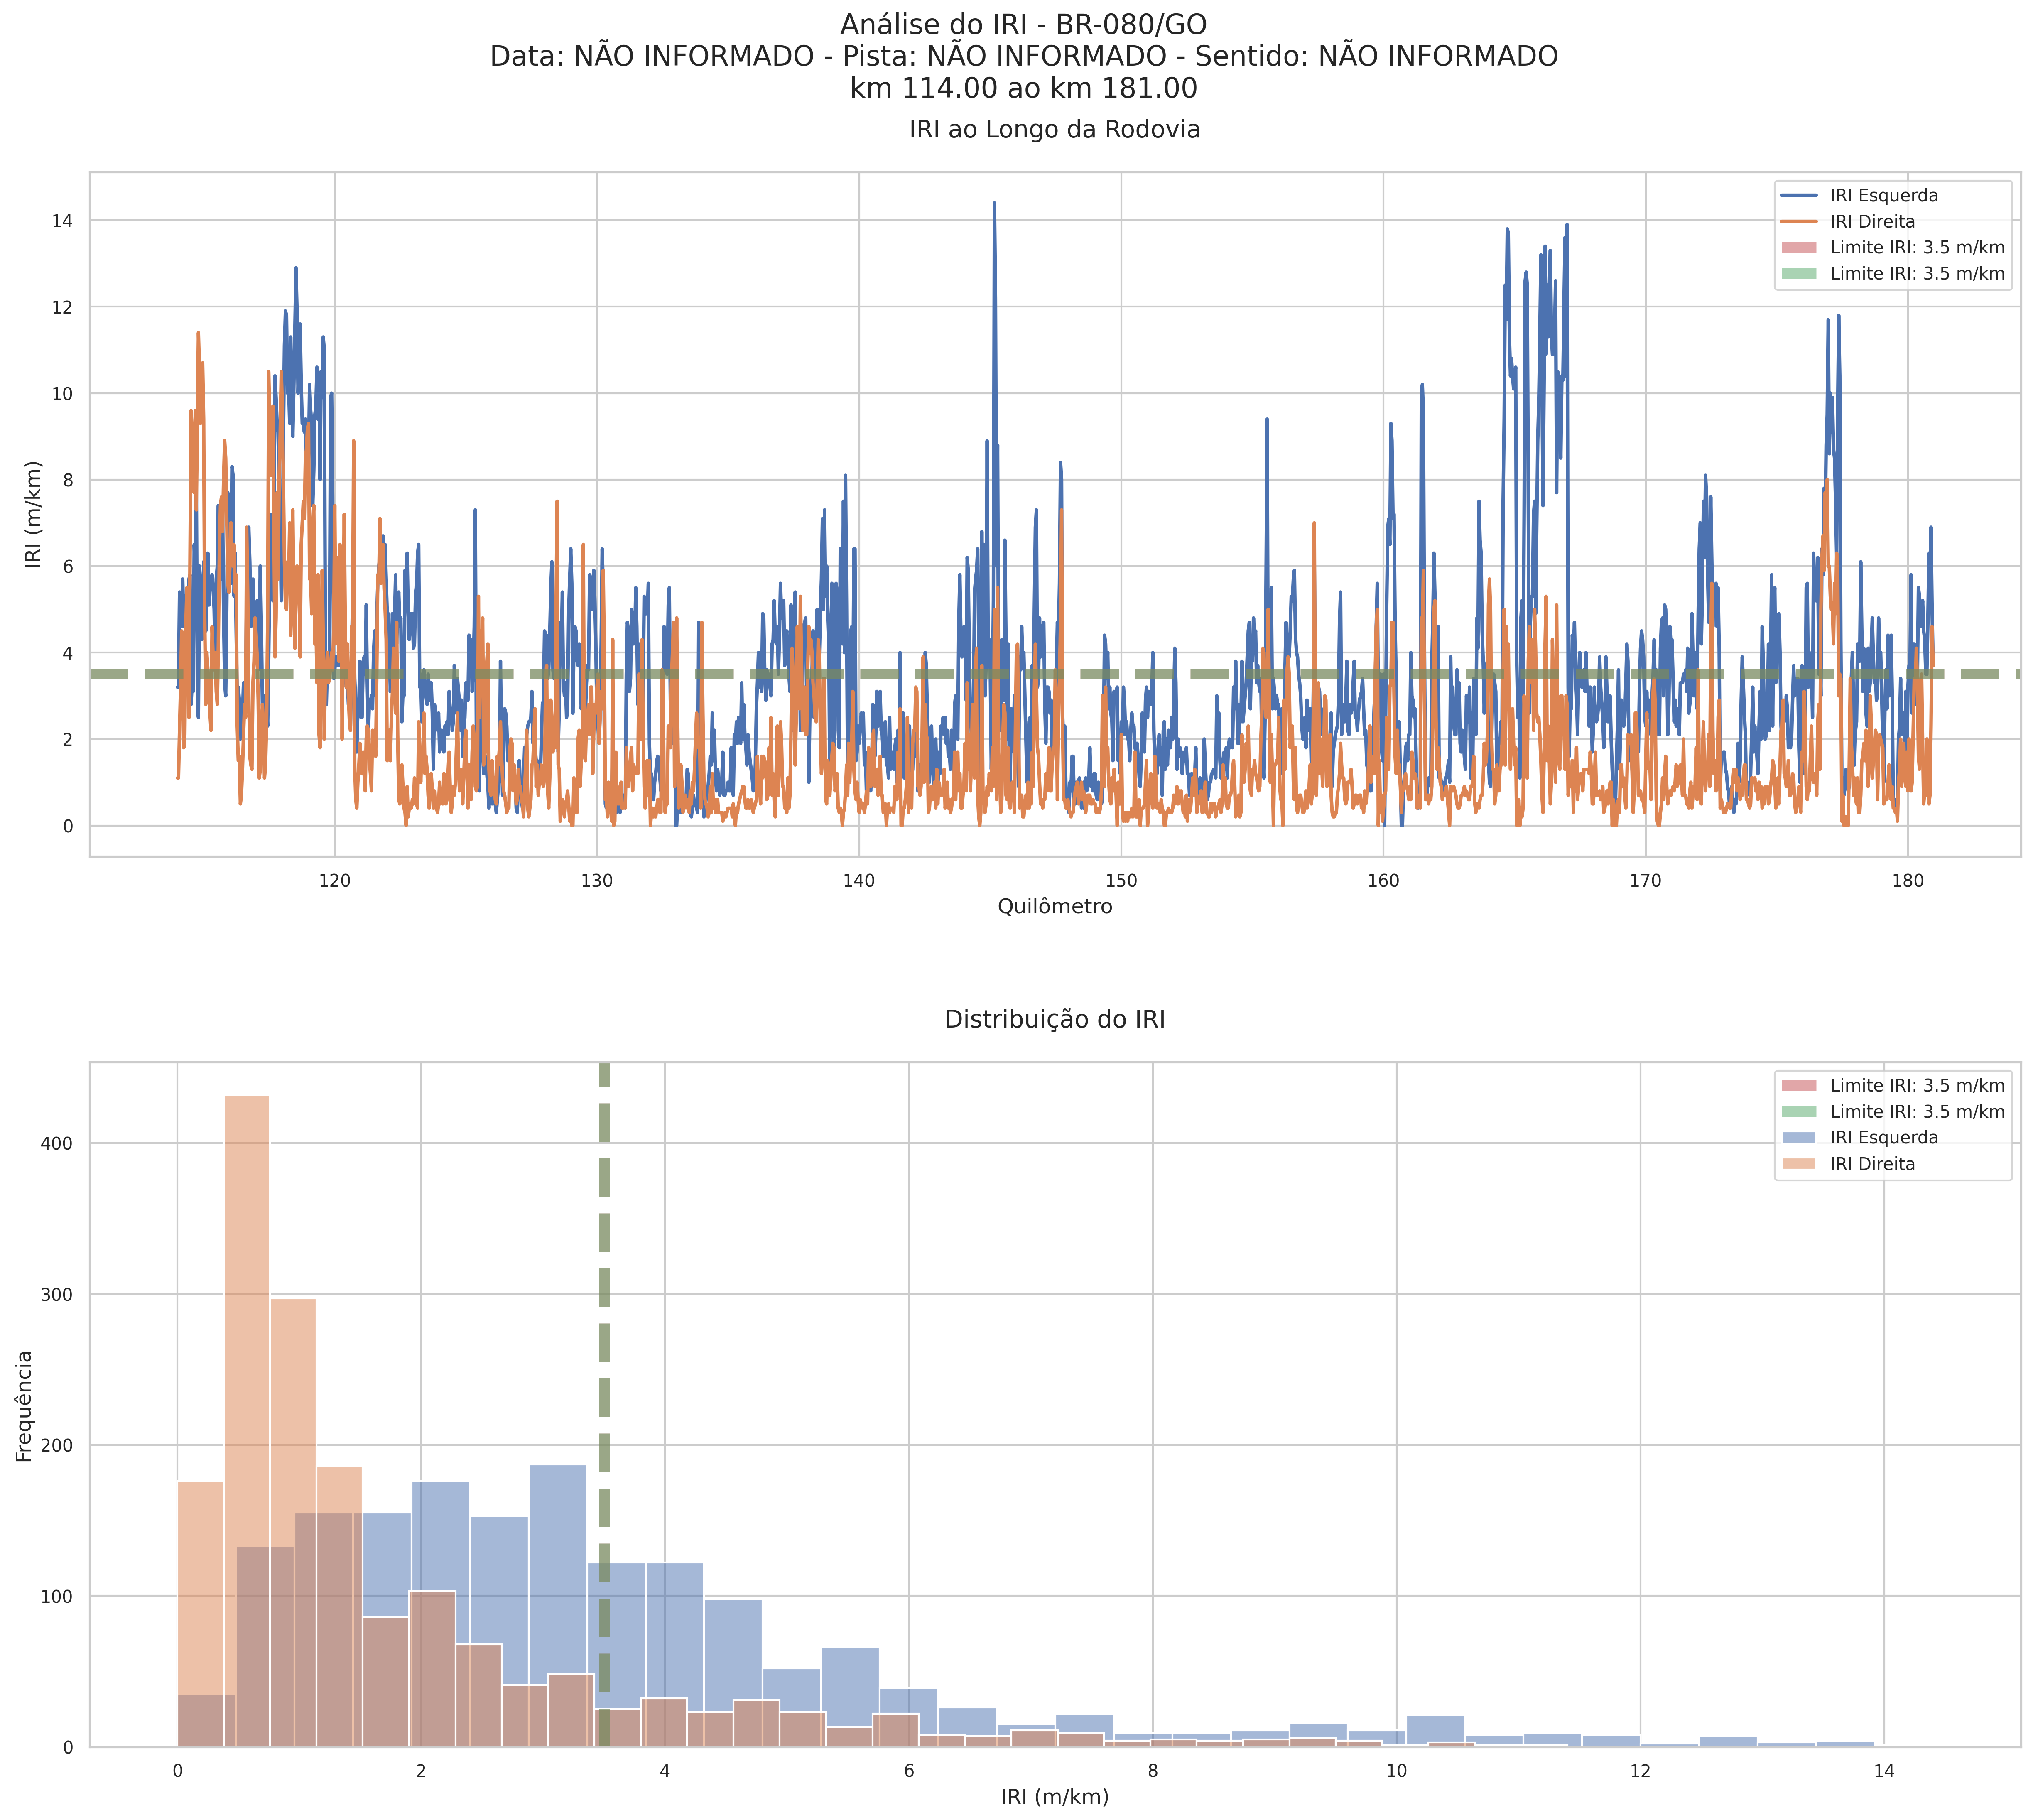

/tmp/ipykernel_15437/2355100427.py:145: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


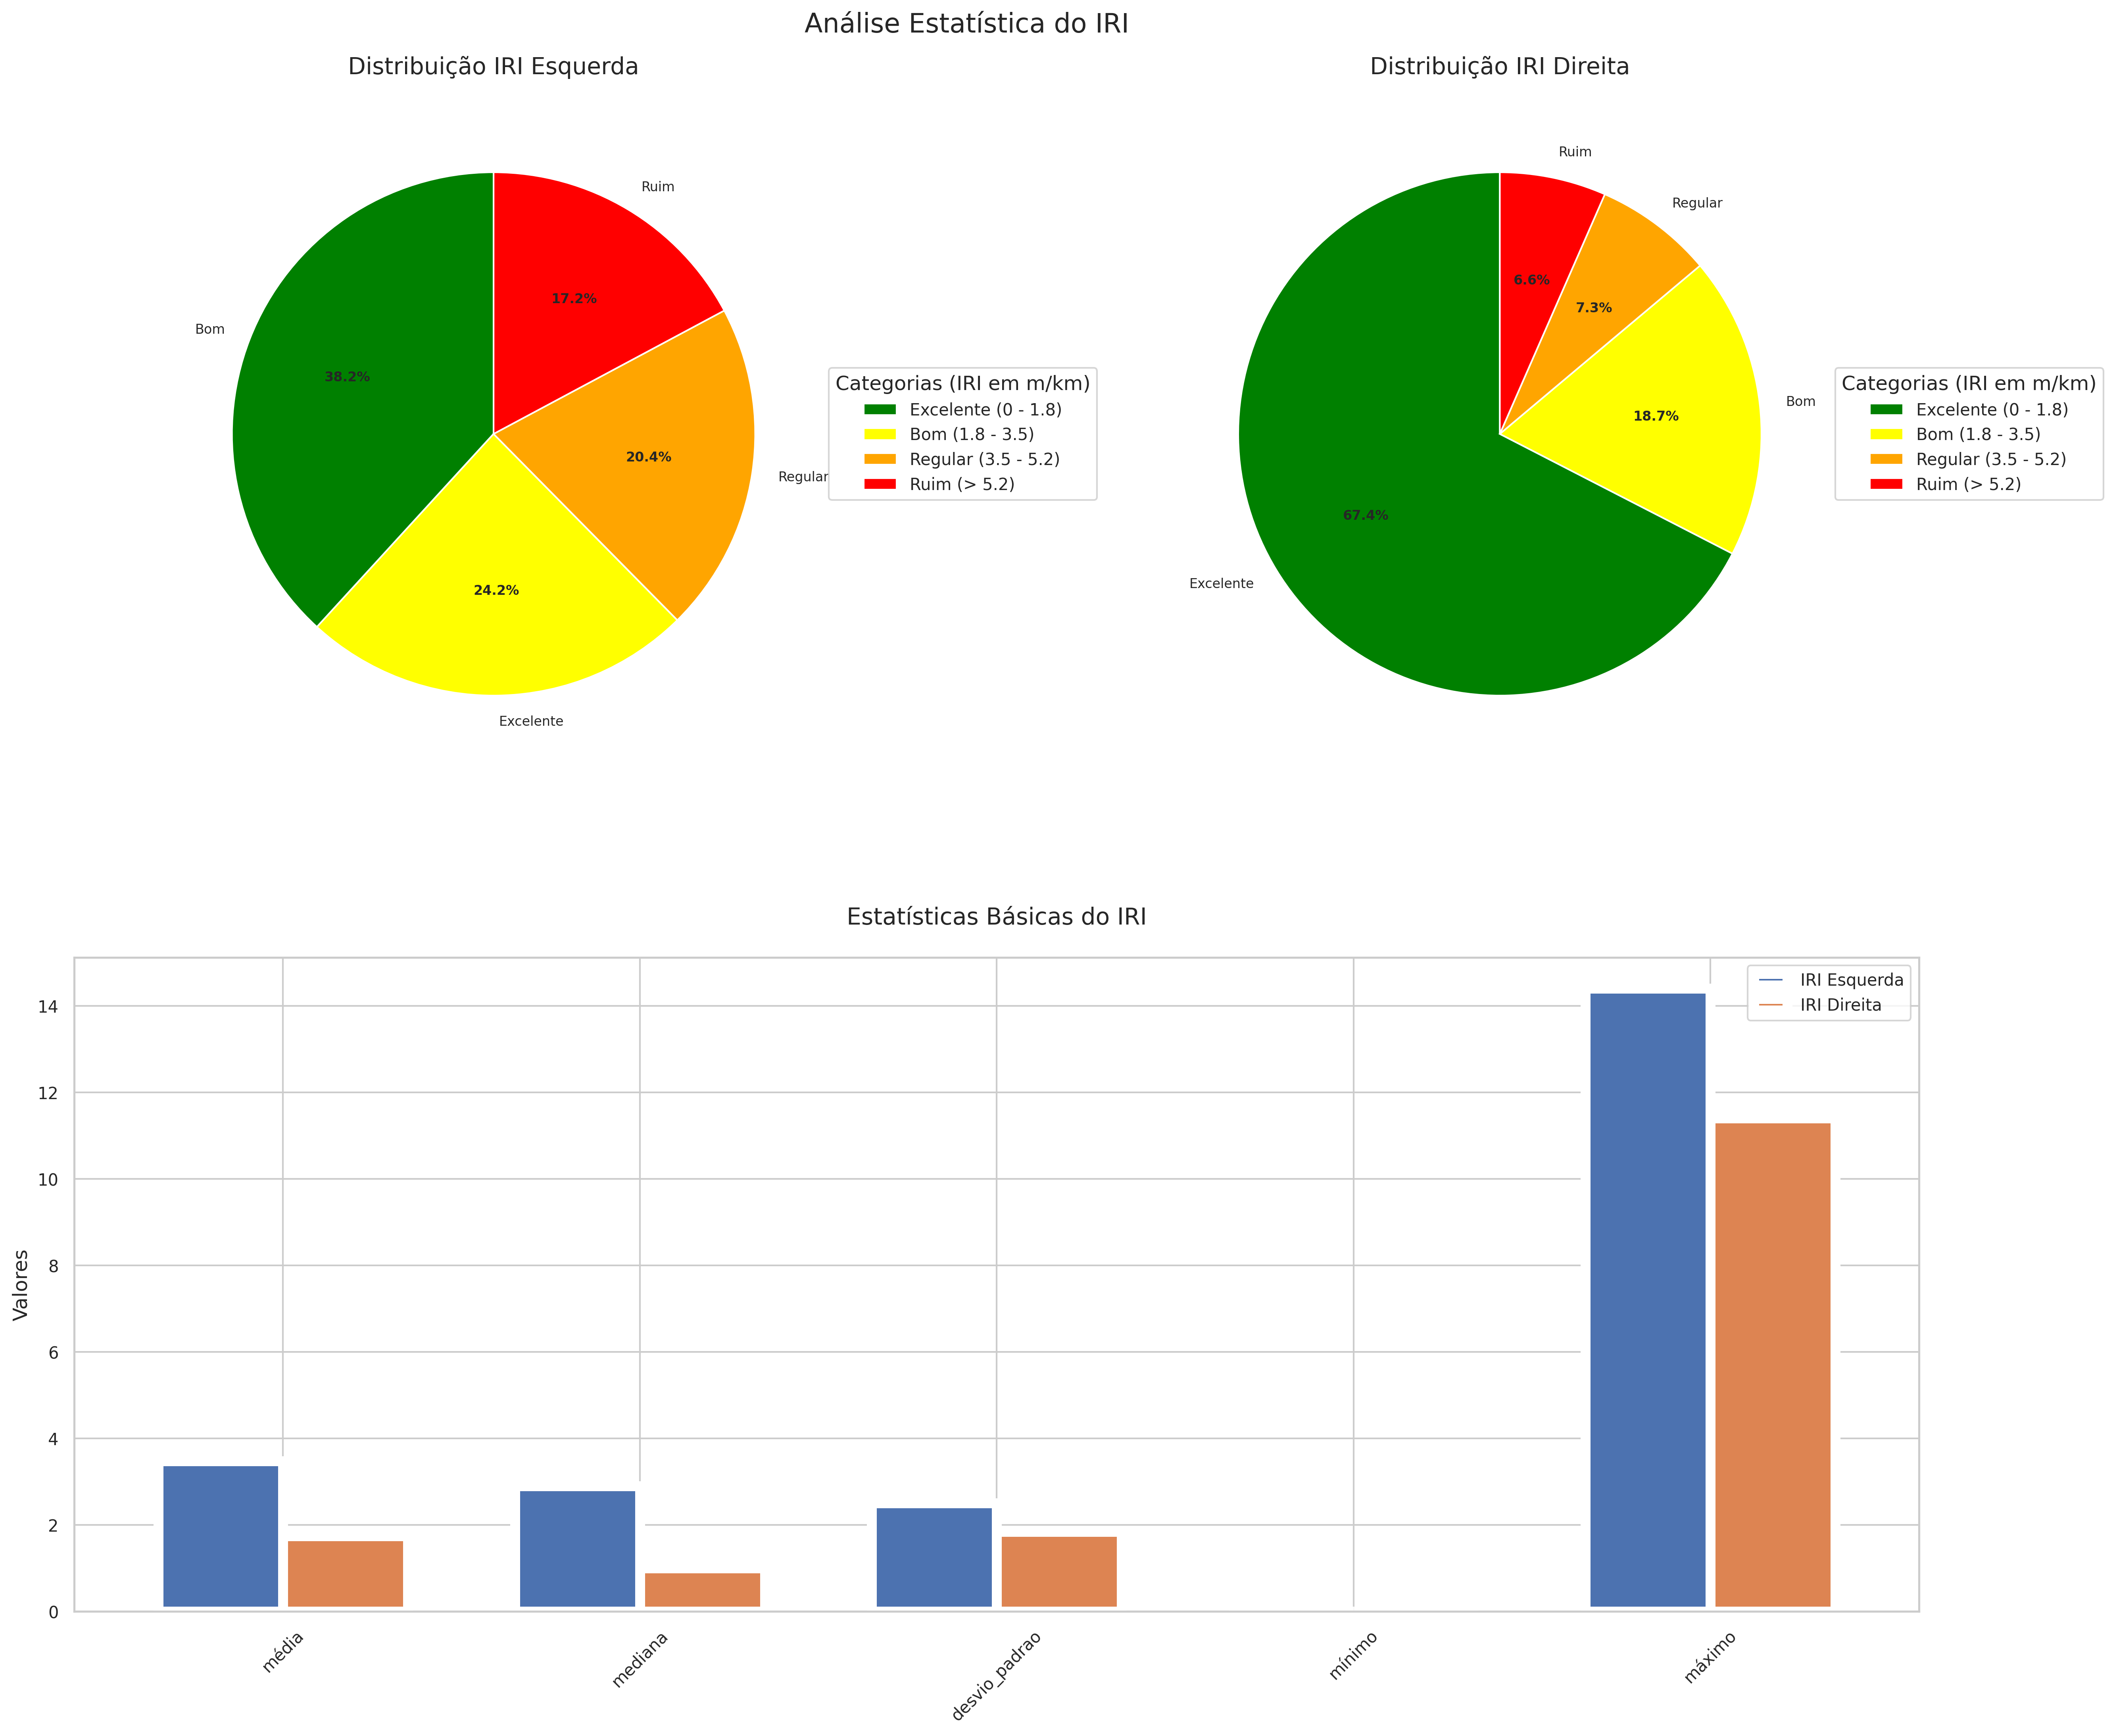

2024-11-19 15:21:34,818 - INFO - Preparando dados para Machine Learning...
2024-11-19 15:21:34,828 - INFO - Dimensões dos dados:
2024-11-19 15:21:34,829 - INFO - - Features shape: (1671, 6)
2024-11-19 15:21:34,830 - INFO - - Targets shape: (1671, 2)
2024-11-19 15:21:34,830 - INFO - 
Primeiras linhas das features:
2024-11-19 15:21:34,831 - INFO -    Quilometro  IRI_Medio  IRI_Diff  IRI_Max  IRI_Rolling_Mean  IRI_Rolling_Std
2      114.08       3.80       3.2      5.4              3.34         1.140943
3      114.12       3.90       1.4      4.6              3.80         0.995615
4      114.16       4.70       0.4      4.9              4.01         0.587792
5      114.20       4.45       2.5      5.7              3.99         0.598331
6      114.24       3.20       2.8      4.6              4.12         0.642845
2024-11-19 15:21:34,837 - INFO - 
Primeiras linhas dos targets:
2024-11-19 15:21:34,838 - INFO -    Next_IRI_Esquerda  Next_IRI_Direita
2                4.6               3.2
3  

Dados preparados com sucesso. Shape das features: (1671, 6), Shape dos targets: (1671, 2)
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   1.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   1.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   2.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   3.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=459; total time=   4.5s
[CV] END bootstrap=Tru

2024-11-19 15:22:17,094 - INFO - Resultados para Next_IRI_Esquerda:
2024-11-19 15:22:17,095 - INFO - RMSE: 1.105
2024-11-19 15:22:17,096 - INFO - R²: 0.811
2024-11-19 15:22:17,097 - INFO - 
Otimizando modelo para Next_IRI_Direita...


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   1.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   1.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   1.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   1.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=459; total time=   3.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=

2024-11-19 15:22:54,116 - INFO - Resultados para Next_IRI_Direita:
2024-11-19 15:22:54,117 - INFO - RMSE: 0.878
2024-11-19 15:22:54,118 - INFO - R²: 0.665
2024-11-19 15:22:54,119 - INFO - Gerando visualizações...


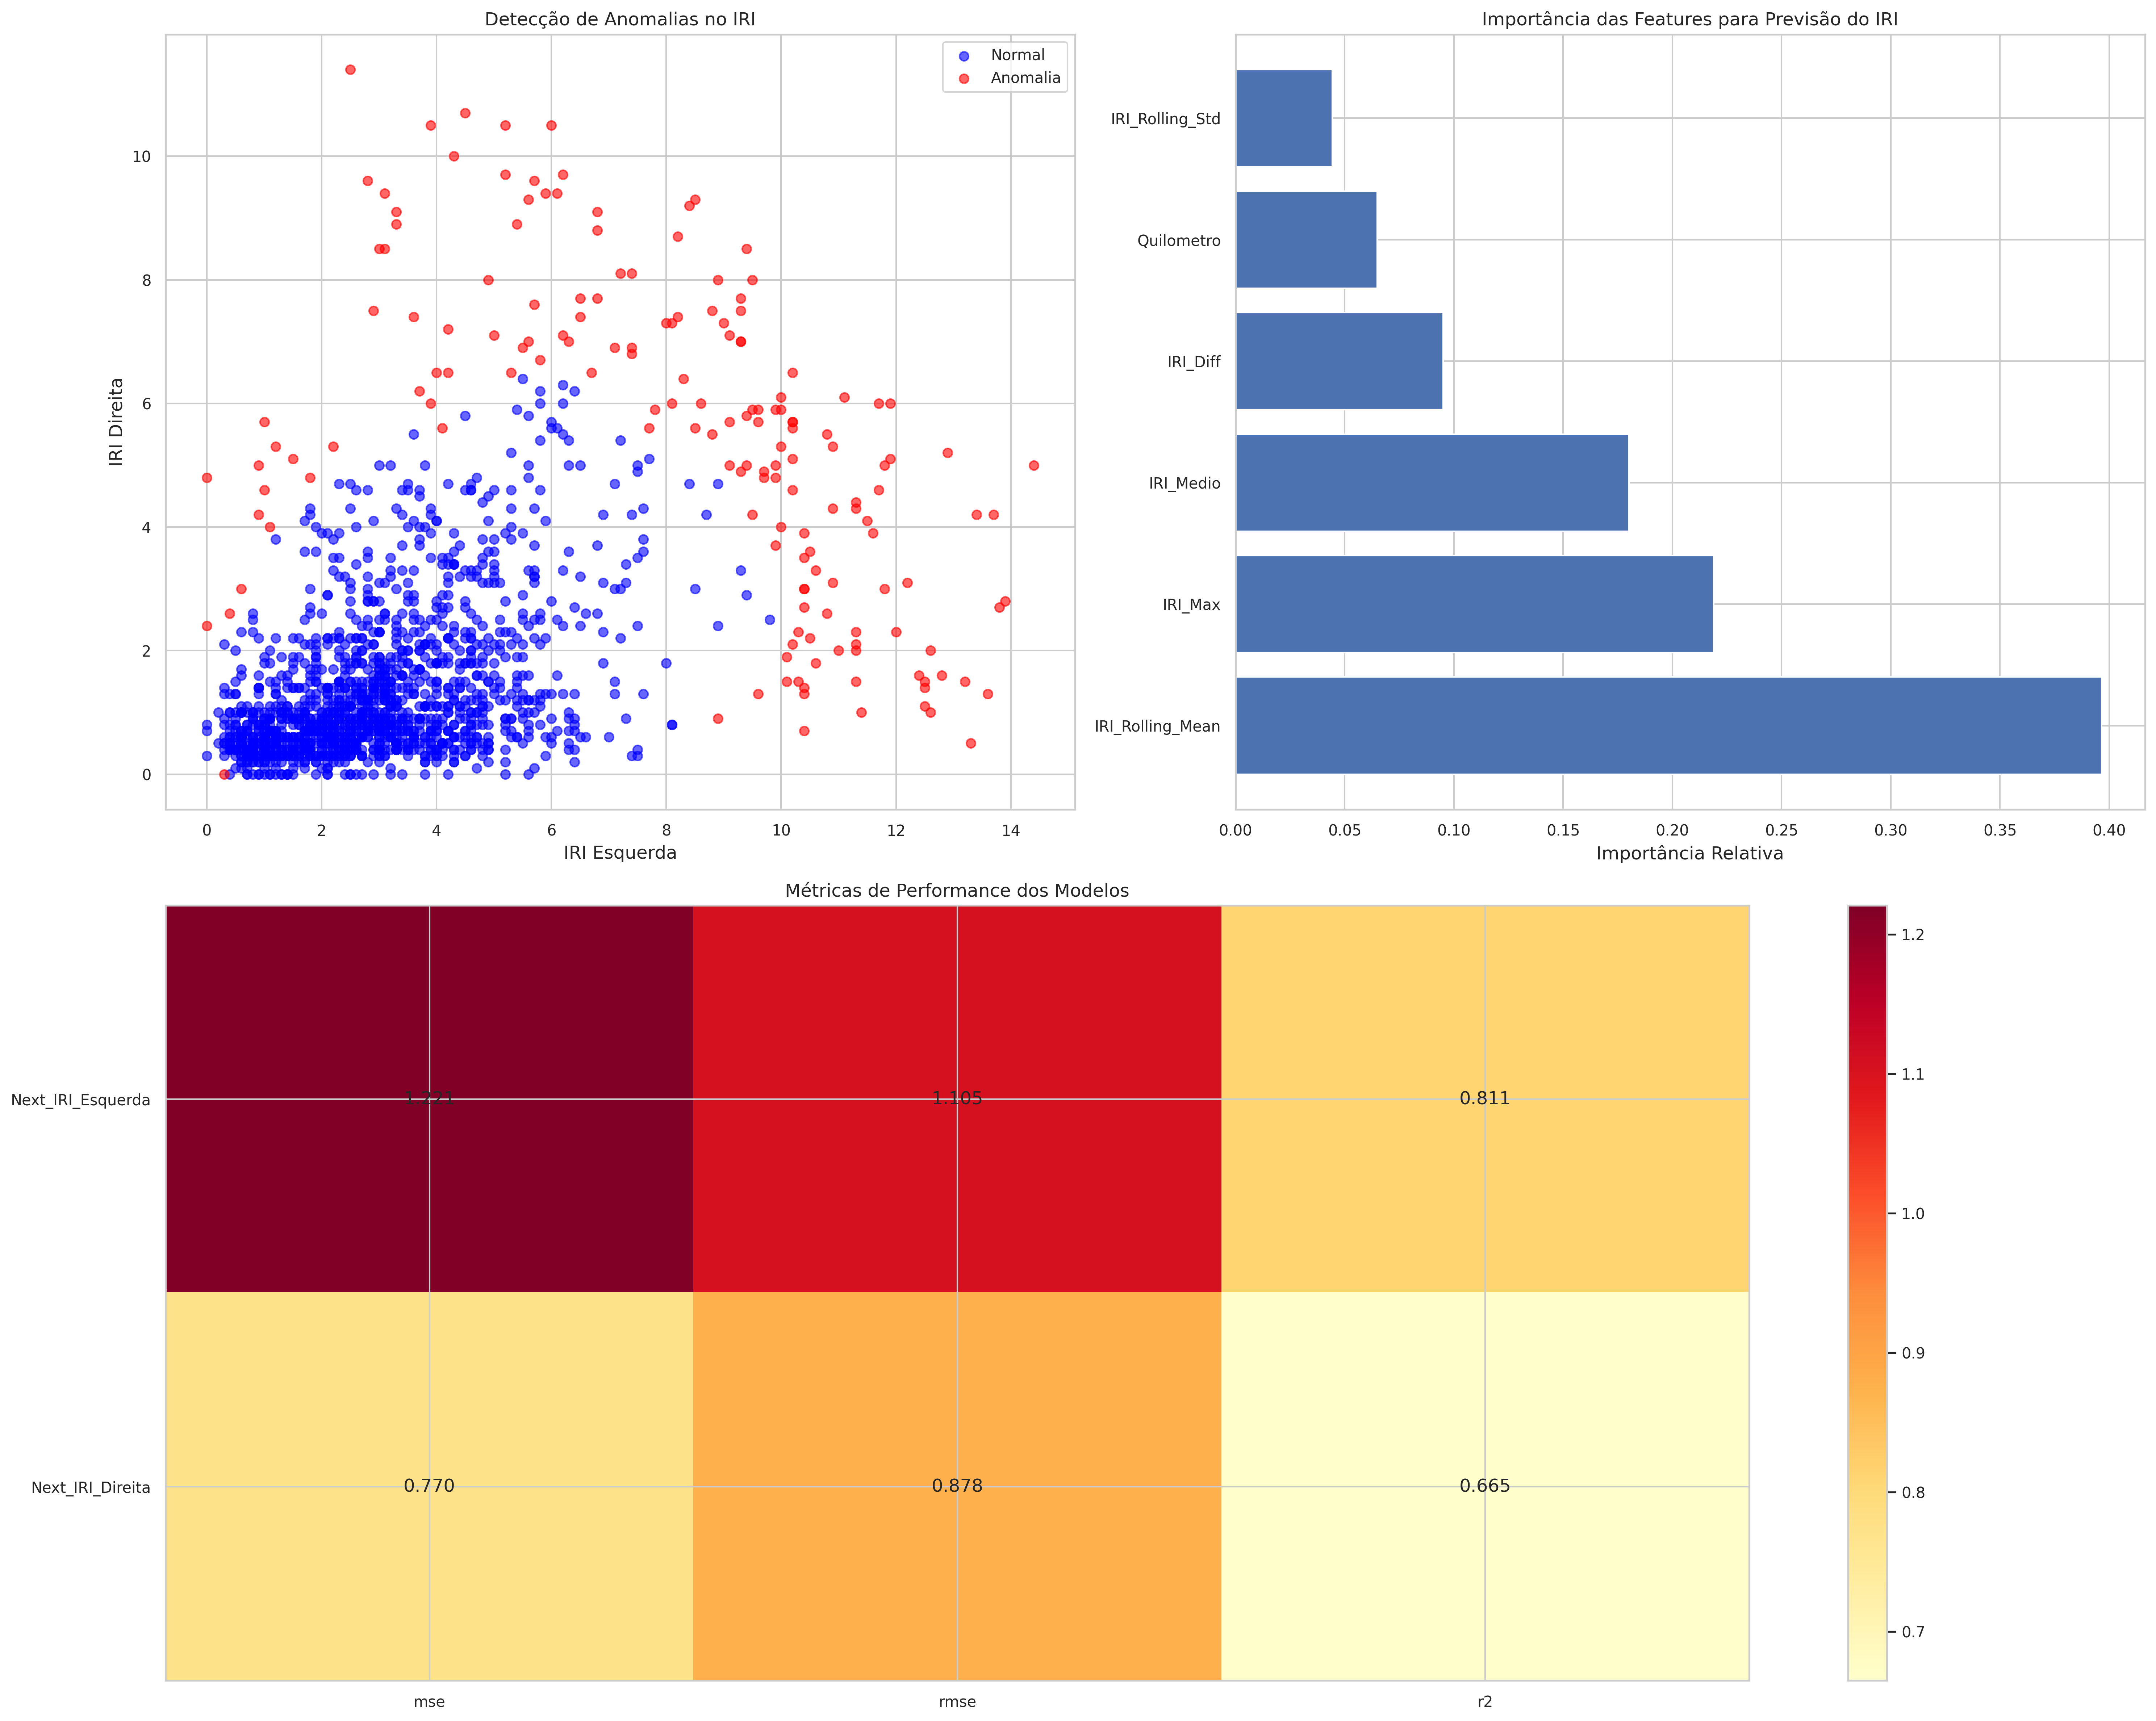

2024-11-19 15:23:01,867 - INFO - Gerando recomendações...
2024-11-19 15:23:02,049 - INFO - Processamento concluído com sucesso!



Insights principais:

1. Detecção de Anomalias:
- Detectadas 168 medições potencialmente problemáticas

2. Features mais importantes para previsão:
- IRI_Rolling_Mean: 0.397
- IRI_Max: 0.219
- IRI_Medio: 0.180

3. Performance dos modelos:

Next_IRI_Esquerda:
- RMSE: 1.105
- R²: 0.811

Next_IRI_Direita:
- RMSE: 0.878
- R²: 0.665

Recomendações para Tomada de Decisão:

1. Manutenção Prioritária:
- Identificados 168 trechos críticos que requerem atenção imediata
- Quilômetros críticos: km 114.5, km 114.6, km 114.6, km 114.6, km 114.7
- IRI médio nos trechos críticos: 6.80

Segmentos contínuos críticos:
- km 114.5 ao km 115.0 (0.5 km)
- km 115.6 ao km 116.6 (1.0 km)
- km 117.5 ao km 120.7 (3.2 km)

2. Tendência do Pavimento:
- Pavimento apresenta tendência estável ou de melhoria
- Taxa de variação: -0.019

3. Análise de Padrões e Recomendações:
- Fatores mais influentes na degradação do pavimento:
  * IRI_Rolling_Mean: 0.397
  * IRI_Max: 0.219
  * IRI_Medio: 0.180

4. Distribuição do IRI:

In [15]:
if __name__ == "__main__":
    try:
        logging.info("Iniciando processamento...")
        logging.info(f"Usando dispositivo: {device}")

        # Verificar se estamos no Google Colab
        IN_COLAB = 'google.colab' in str(get_ipython())
        
        if IN_COLAB:
            # Clonar o repositório
            !git clone https://github.com/romulobrito/Analise-IRI.git
            
            # Atualizar PROJECT_ROOT para o diretório do projeto clonado
            global PROJECT_ROOT
            PROJECT_ROOT = Path('/content/Analise-IRI')
            
            # Definir diretório de dados
            data_dir = PROJECT_ROOT / "data"
            
            # Se os dados não estiverem no repositório, solicitar upload
            if not (data_dir / "Cópia de 500-IMT-BR080GO - INVENTARIO km 114.00 ao km 181.00_copia.xlsx").exists():
                from google.colab import files
                print("Dados não encontrados no repositório. Por favor, faça upload dos arquivos Excel e PDF")
                uploaded = files.upload()
                
                # Criar diretório data se não existir
                data_dir.mkdir(parents=True, exist_ok=True)
                
                # Mover arquivos uploadados para o diretório data
                for filename in uploaded.keys():
                    source = Path(filename)
                    destination = data_dir / filename
                    if source.exists():
                        with open(destination, 'wb') as f:
                            f.write(uploaded[filename])
            
        else:
            # Verificar e criar diretório de dados se não existir
            data_dir = PROJECT_ROOT / "data"
            data_dir.mkdir(parents=True, exist_ok=True)
            logging.info(f"Diretório de dados verificado: {data_dir}")
        
        # Definir caminhos relativos à pasta data/
        caminho_excel = data_dir / "Cópia de 500-IMT-BR080GO - INVENTARIO km 114.00 ao km 181.00_copia.xlsx"
        caminho_pdf = data_dir / "700_IMT_BR153TO_BR153GO_BR080GO_BR414GO_RA23_R00.pdf"

        # Verificar se os arquivos existem
        if not caminho_excel.exists():
            raise FileNotFoundError(f"Arquivo Excel não encontrado: {caminho_excel}")
        if not caminho_pdf.exists():
            raise FileNotFoundError(f"Arquivo PDF não encontrado: {caminho_pdf}")
            
        logging.info(f"Arquivos encontrados:")
        logging.info(f"- Excel: {caminho_excel.name}")
        logging.info(f"- PDF: {caminho_pdf.name}")
        
        # Extrair informações cabeçalho
        logging.info("Extraindo informações do cabeçalho...")
        info_cabecalho = extrair_cabecalho(str(caminho_excel))
        
        # Carregar e processar dados
        logging.info("Carregando e processando dados...")
        df = pd.read_excel(caminho_excel)
        if df.empty:
            raise ValueError("DataFrame está vazio após leitura do Excel")
            
        limites = extrair_limites_iri(str(caminho_pdf))
        if not limites:
            raise ValueError("Não foi possível extrair limites do PDF")
            
        df_processado = processar_dados_pavimento(df)
        if df_processado.empty:
            raise ValueError("DataFrame processado está vazio")
            
        # Verificar colunas necessárias
        colunas_requeridas = ['Quilometro', 'IRI_Esquerda', 'IRI_Direita']
        if not all(col in df_processado.columns for col in colunas_requeridas):
            raise ValueError(f"Colunas necessárias não encontradas. Colunas presentes: {df_processado.columns.tolist()}")
        
        # Exibir valores de limites
        logging.info("Limites extraídos:")
        for periodo, valores in limites.items():
            for valor in valores:
                logging.info(f"Período: {periodo} - IRI: {valor['iri']} m/km aplicável em {valor['porcentagem']}% da rodovia")

        # Criar limites simplificados
        limites_simplificados = {
            'IRI_100': [{'iri': max(valor['iri'] for valores in limites.values() for valor in valores),
                        'porcentagem': 100.0}],
            'IRI_80': [{'iri': min(valor['iri'] for valores in limites.values() for valor in valores),
                       'porcentagem': 100.0}]
        }

        # Gerar relatório
        logging.info("Gerando relatório completo...")
        gerar_relatorio_completo(df_processado, limites_simplificados, info_cabecalho)
        
        # Preparar dados para ML
        logging.info("Preparando dados para Machine Learning...")
        features, targets = preparar_dados_ml(df_processado)
        
        if features.empty or targets.empty:
            raise ValueError("Features ou targets vazios após preparação")
        
        logging.info(f"Dimensões dos dados:")
        logging.info(f"- Features shape: {features.shape}")
        logging.info(f"- Targets shape: {targets.shape}")
        logging.info("\nPrimeiras linhas das features:")
        logging.info(features.head())
        logging.info("\nPrimeiras linhas dos targets:")
        logging.info(targets.head())
        
        # Treinar modelos
        logging.info("Treinando modelos...")
        resultados_ml = treinar_modelo_predicao(features, targets)
        
        # Visualizar insights
        logging.info("Gerando visualizações...")
        visualizar_insights_ml(df_processado, resultados_ml)
        
        # Gerar recomendações
        logging.info("Gerando recomendações...")
        gerar_recomendacoes(df_processado, resultados_ml)
        
        logging.info("Processamento concluído com sucesso!")
        
    except FileNotFoundError as e:
        logging.error(f"Erro ao encontrar arquivo: {e}")
    except ValueError as e:
        logging.error(f"Erro nos dados: {e}")
    except pd.errors.EmptyDataError as e:
        logging.error(f"Erro ao ler dados vazios: {e}")
    except Exception as e:
        logging.error(f"Erro inesperado: {e}")
        logging.error(traceback.format_exc())
    finally:
        plt.close('all')



Na primeira figura, a análise do IRI ao Longo da Rodovia revela que tanto o IRI da pista esquerda quanto o da pista direita apresentam variações significativas ao longo dos quilômetros, com valores de IRI que ultrapassam os limites aceitáveis em vários trechos. O limite de 2,7 m/km (em verde) é o valor recomendado para a rodovia estar em boas condições, enquanto 3,5 m/km (em vermelho) indica um limite aceitável antes de necessitar de intervenções de manutenção. As linhas de IRI (representadas pelas cores azul para a esquerda e laranja para a direita) mostram que a pista esquerda frequentemente excede o limite de 3,5 m/km, sugerindo que há áreas que exigem atenção urgente. Esse comportamento irregular destaca a necessidade de intervenções localizadas para melhorar a qualidade da rodovia.

A segunda parte da figura é dedicada à Distribuição do IRI, apresentada em um histograma combinado para a pista esquerda e direita. A distribuição do IRI para a pista esquerda apresenta uma concentração maior de valores acima de 3,5 m/km, com uma cauda longa, indicando que existem vários trechos críticos que precisam de manutenção. A pista direita, por outro lado, mostra uma concentração significativa de valores abaixo de 3,5 m/km, com maior prevalência de condições Excelente e Bom. No geral, os dados indicam que a pista direita está em melhores condições comparada à pista esquerda.

Além disso, a segunda figura inclui gráficos de pizza que ilustram a distribuição percentual do IRI em diferentes categorias para as duas pistas. Para a pista esquerda, 38,2% do trecho se encontra em estado Bom (entre 1,8 e 3,5 m/km), enquanto 24,2% está Regular (entre 3,5 e 5,2 m/km) e 17,2% está em Ruim (acima de 5,2 m/km). Já para a pista direita, 67,4% do trecho se encontra em Excelente (abaixo de 1,8 m/km), com apenas 6% em Ruim. Essa comparação evidencia que a pista direita está em melhores condições gerais, com uma maior porcentagem de trechos classificados como excelente.

O gráfico de Estatísticas Básicas fornece uma visão quantitativa do IRI, comparando as médias, medianas, desvio padrão e valores extremos para as duas pistas. Para a pista esquerda, a média do IRI gira em torno de 3,5 m/km, enquanto para a pista direita é cerca de 1,8 m/km. O desvio padrão da pista esquerda é mais alto, indicando maior variabilidade nos dados e mais trechos com condições adversas. Além disso, o valor máximo do IRI para a pista esquerda atinge 14 m/km, evidenciando a presença de trechos altamente deteriorados. A pista direita, embora também apresente valores máximos elevados, não possui a mesma frequência de problemas.

Com base nesses resultados, algumas recomendações são evidentes. Primeiramente, é necessário priorizar a manutenção nos trechos da pista esquerda, onde a deterioração é mais acentuada, e as condições do pavimento ultrapassam o limite de 3,5 m/km com frequência. Além disso, o uso de modelos preditivos pode ser uma ferramenta útil para prever a evolução do IRI ao longo do tempo e orientar decisões de manutenção. A tendência geral de deterioração observada na pista esquerda sugere que intervenções preventivas sejam planejadas, com o aumento da frequência de monitoramento nesses trechos.

Por fim, a distribuição do IRI revela que a maior parte da rodovia, especialmente no lado direito, está em boas condições. No entanto, os trechos críticos, especialmente na pista esquerda, precisam ser monitorados de perto e receber atenção especial. A análise também sugere que o planejamento de manutenção deve ser mais intenso em segmentos específicos, e a rodovia pode se beneficiar de uma abordagem mais segmentada para otimizar recursos e garantir a segurança e o conforto dos usuários.

Os gráficos e dados apresentados na Figura 3 fornecem uma visão detalhada do comportamento do IRI da rodovia em análise. A análise de detecção de anomalias identificou 168 medições que se desviam do padrão esperado (aproximadamente 10% dos dados coletados). Estas anomalias, indicadas em vermelho no gráfico de dispersão, correspondem a trechos críticos com valores de IRI significativamente elevados. Três segmentos contínuos críticos foram identificados entre os quilômetros 114.5-115.0 (0,5 km), 115.6-116.6 (1,0 km) e 117.5-120.7 (3,2 km), representando as áreas que demandam atenção mais urgente.

O gráfico de dispersão (scatterplot) no canto superior esquerdo apresenta a relação entre os valores de IRI das pistas esquerda e direita. Os pontos em azul representam trechos "normais", com valores de IRI dentro do comportamento esperado, enquanto os pontos em vermelho indicam anomalias que requerem atenção imediata. A concentração de pontos azuis no canto inferior esquerdo do gráfico (valores entre 0 e 3 m/km) indica que a maioria dos trechos está em boas condições. As anomalias (pontos vermelhos) aparecem principalmente em duas regiões: na região superior direita (IRI elevado em ambas as pistas, acima de 6 m/km) e nas regiões superior esquerda e inferior direita (desequilíbrio entre as condições das pistas).
A análise de importância das features revela uma hierarquia clara na influência das variáveis sobre o comportamento do IRI. O IRI_Rolling_Mean emerge como o fator mais significativo, com importância relativa de 0,397, seguido pelo IRI_Max com 0,219 e o IRI_Medio com 0,180. Esta distribuição de importância sugere que as condições médias do pavimento em trechos consecutivos têm maior impacto na previsão de sua degradação futura.
Os modelos de Machine Learning desenvolvidos demonstraram desempenho variado entre as pistas. Para a pista esquerda (Next_IRI_Esquerda), o modelo alcançou resultados robustos com R² de 0,811 e RMSE de 1,105, indicando uma boa capacidade de previsão. Já para a pista direita (Next_IRI_Direita), o desempenho foi moderado, com R² de 0,665 e RMSE de 0,878, sugerindo que outros fatores não contemplados no modelo podem influenciar o comportamento do pavimento neste lado da via.

A análise da distribuição do IRI revela um panorama diversificado das condições do pavimento. Aproximadamente 25% dos trechos apresentam IRI abaixo de 1,30, classificados como Excelente, com uma mediana de 2,10. A tendência geral do pavimento mostra uma leve melhoria, evidenciada pela taxa de variação negativa de -0,019, sugerindo que as ações de manutenção recentes podem estar surtindo efeito.
Com base nestes resultados, recomenda-se uma abordagem estratégica para a manutenção da rodovia. Primeiramente, deve-se priorizar intervenções nos três segmentos críticos identificados, implementando um sistema de monitoramento contínuo com foco especial no IRI_Rolling_Mean. A classificação geral de MÉDIA PRIORIDADE sugere a necessidade de um planejamento de manutenção preventiva, com alocação estratégica de recursos nos trechos classificados como Regular e Ruim. O uso das previsões geradas pelos modelos pode auxiliar na otimização deste planejamento, permitindo intervenções mais precisas e eficientes.

Esta abordagem orientada por dados oferece uma base sólida para decisões de manutenção, permitindo a otimização dos recursos disponíveis e garantindo a segurança e o conforto dos usuários da rodovia. A combinação de análise de anomalias, modelagem preditiva e monitoramento contínuo fornece as ferramentas necessárias para uma gestão mais eficiente e proativa da infraestrutura rodoviária.

📜 7. Conclusão

A análise detalhada do IRI da rodovia BR-080/GO, no trecho entre os quilômetros 114.00 e 181.00, revelou insights significativos para a gestão da manutenção rodoviária. Através da aplicação de técnicas de Machine Learning, incluindo Random Forest e Isolation Forest, foi possível identificar padrões de deterioração e prever tendências futuras com considerável precisão.
A investigação identificou 168 trechos críticos, representando aproximadamente 10% do total analisado, com três segmentos contínuos principais requerendo atenção imediata: um trecho de 0.5 km (do km 114.5 ao 115.0), outro de 1.0 km (do km 115.6 ao 116.6) e um segmento mais extenso de 3.2 km (do km 117.5 ao 120.7). Nesses trechos críticos, o IRI médio alcança 6.80, valor significativamente superior ao limite aceitável de 3.5 m/km estabelecido nas normativas.

Os modelos preditivos desenvolvidos demonstraram robustez significativa, especialmente para a pista esquerda, que apresentou um R² de 0,811 e RMSE de 1,105. A pista direita, embora com performance menor (R² de 0,665 e RMSE de 0,878), ainda fornece previsões úteis para o planejamento de manutenção. Esta diferença de desempenho entre as pistas sugere uma maior complexidade nos padrões de degradação da pista direita.
A análise de importância das features revelou que o IRI_Rolling_Mean é o fator mais significativo para a previsão da degradação, com importância relativa de 0,397. O IRI_Max (0,219) e o IRI_Medio (0,180) apresentaram influência secundária, mas ainda significativa. Este conhecimento permite uma abordagem mais focada no monitoramento e manutenção.

O estado geral do pavimento apresenta uma distribuição interessante, com 25% dos trechos exibindo IRI abaixo de 1,30 (condição excelente), enquanto outros 25% apresentam valores acima de 3,25, próximos ao limite crítico. A tendência estável do pavimento, com taxa de variação de -0,019, sugere que as práticas atuais de manutenção estão sendo efetivas, embora existam áreas que necessitam de atenção especial.
Para a gestão futura da rodovia, recomenda-se a implementação de um programa de monitoramento mais intensivo nas áreas com IRI acima de 3,25, com foco especial nos três segmentos contínuos críticos identificados. Os modelos preditivos desenvolvidos podem ser utilizados para antecipar degradações e otimizar o planejamento de intervenções preventivas.

Esta análise demonstra o potencial significativo da aplicação de técnicas de Machine Learning na gestão rodoviária, proporcionando uma abordagem mais precisa e proativa na manutenção do pavimento. Os resultados obtidos fornecem uma base para decisões fundamentadas em dados, permitindo a otimização de recursos e a melhoria contínua da qualidade da infraestrutura rodoviária.
Em trabalhos futuros, pretendo aprimorar este MVP implementando validação cruzada temporal e análise de resíduos mais detalhada. Também planejo explorar features adicionais relacionadas a efeitos sazonais, clima e tráfego, além de melhorar a interpretabilidade do modelo com SHAP values. Essas futuras melhorias, combinadas com os métodos já implementados, permitirão uma análise ainda mais robusta e confiável para aplicação em produção.